In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modified_data = pd.read_csv('term-deposit-marketing-after-outreach-variables.csv')
modified_data = modified_data.drop('y', axis=1)

In [3]:
modified_data.head()

marital  education default housing loan  contact  duration     age_group  \
0  married   tertiary      no     yes   no  unknown      4.35  age_42_to_60   
1   single  secondary      no     yes   no  unknown      2.52  age_42_to_60   
2  married  secondary      no     yes  yes  unknown      1.27  age_33_to_42   
3  married    unknown      no     yes   no  unknown      1.53  age_42_to_60   
4   single    unknown      no      no   no  unknown      3.30  age_33_to_42   

   y_encoded         balance_group                job_group  \
0          0  balance_2000_to_4000  management_entrepreneur   
1          0      balance_0_to_750           office_support   
2          0      balance_0_to_750  management_entrepreneur   
3          0   balance_750_to_2000             manual_labor   
4          0      balance_0_to_750              not_working   

  campaign_category_v2 month_period day_category  
0           campaign_1     mid_year   day_1_to_9  
1           campaign_1     mid_year   day_1_to_9  
2           campaign_1     mid_year   day_1_to_9  
3           campaign_1     mid_year   day_1_to_9  
4           campaign_1     mid_year   day_1_to_9

#### The 'day_category' feature has been found out to have very little distinction for the subscription rates between the different categories, so it might not be that important for the ML classification task.

In [4]:
modified_data = modified_data.drop(columns = ['day_category'], axis=1)

In [5]:
modified_data.head()

marital  education default housing loan  contact  duration     age_group  \
0  married   tertiary      no     yes   no  unknown      4.35  age_42_to_60   
1   single  secondary      no     yes   no  unknown      2.52  age_42_to_60   
2  married  secondary      no     yes  yes  unknown      1.27  age_33_to_42   
3  married    unknown      no     yes   no  unknown      1.53  age_42_to_60   
4   single    unknown      no      no   no  unknown      3.30  age_33_to_42   

   y_encoded         balance_group                job_group  \
0          0  balance_2000_to_4000  management_entrepreneur   
1          0      balance_0_to_750           office_support   
2          0      balance_0_to_750  management_entrepreneur   
3          0   balance_750_to_2000             manual_labor   
4          0      balance_0_to_750              not_working   

  campaign_category_v2 month_period  
0           campaign_1     mid_year  
1           campaign_1     mid_year  
2           campaign_1     mid_year  
3           campaign_1     mid_year  
4           campaign_1     mid_year

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#get dummies for categorical variables before splitting
categorical_columns = modified_data.select_dtypes(include=['object']).columns 
numeric_columns = modified_data.select_dtypes(include=[np.number]).columns

# Convert categorical variables to dummy/indicator variables
modified_data = pd.get_dummies(modified_data, columns=categorical_columns, drop_first=True)

# Add 'customer_id' column based on the index
modified_data = modified_data.reset_index().rename(columns={'index': 'customer_id'})

# Split into train and test sets
train_df, test_df = train_test_split(modified_data, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [7]:
modified_data.head()

customer_id  duration  y_encoded  marital_married  marital_single  \
0            0      4.35          0             True           False   
1            1      2.52          0            False            True   
2            2      1.27          0             True           False   
3            3      1.53          0             True           False   
4            4      3.30          0            False            True   

   education_secondary  education_tertiary  education_unknown  default_yes  \
0                False                True              False        False   
1                 True               False              False        False   
2                 True               False              False        False   
3                False               False               True        False   
4                False               False               True        False   

   housing_yes  ...  balance_group_balance_under_0  job_group_manual_labor  \
0         True  ...                          False                   False   
1         True  ...                          False                   False   
2         True  ...                          False                   False   
3         True  ...                          False                    True   
4        False  ...                          False                   False   

   job_group_not_working  job_group_office_support  \
0                  False                     False   
1                  False                      True   
2                  False                     False   
3                  False                     False   
4                   True                     False   

   campaign_category_v2_campaign_2  campaign_category_v2_campaign_3  \
0                            False                            False   
1                            False                            False   
2                            False                            False   
3                            False                            False   
4                            False                            False   

   campaign_category_v2_campaign_gt10  campaign_category_v2_campaign_mt3_lt11  \
0                               False                                   False   
1                               False                                   False   
2                               False                                   False   
3                               False                                   False   
4                               False                                   False   

   month_period_mid_year  month_period_start_year  
0                   True                    False  
1                   True                    False  
2                   True                    False  
3                   True                    False  
4                   True                    False  

[5 rows x 29 columns]

In [8]:
train_df.head()

customer_id  duration  y_encoded  marital_married  marital_single  \
0        19066      3.08          0             True           False   
1        13625      2.27          0             True           False   
2        34164      2.43          0             True           False   
3        36675      2.90          0             True           False   
4         2165      6.43          0            False            True   

   education_secondary  education_tertiary  education_unknown  default_yes  \
0                False                True              False        False   
1                 True               False              False        False   
2                False               False              False        False   
3                 True               False              False        False   
4                 True               False              False        False   

   housing_yes  ...  balance_group_balance_under_0  job_group_manual_labor  \
0        False  ...                          False                   False   
1         True  ...                          False                    True   
2         True  ...                          False                    True   
3         True  ...                          False                   False   
4         True  ...                           True                   False   

   job_group_not_working  job_group_office_support  \
0                  False                      True   
1                  False                     False   
2                  False                     False   
3                   True                     False   
4                  False                      True   

   campaign_category_v2_campaign_2  campaign_category_v2_campaign_3  \
0                             True                            False   
1                            False                            False   
2                            False                            False   
3                             True                            False   
4                             True                            False   

   campaign_category_v2_campaign_gt10  campaign_category_v2_campaign_mt3_lt11  \
0                               False                                   False   
1                               False                                   False   
2                               False                                   False   
3                               False                                   False   
4                               False                                   False   

   month_period_mid_year  month_period_start_year  
0                   True                    False  
1                   True                    False  
2                   True                    False  
3                   True                    False  
4                   True                    False  

[5 rows x 29 columns]

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             31360 non-null  int64  
 1   duration                                31360 non-null  float64
 2   y_encoded                               31360 non-null  int64  
 3   marital_married                         31360 non-null  bool   
 4   marital_single                          31360 non-null  bool   
 5   education_secondary                     31360 non-null  bool   
 6   education_tertiary                      31360 non-null  bool   
 7   education_unknown                       31360 non-null  bool   
 8   default_yes                             31360 non-null  bool   
 9   housing_yes                             31360 non-null  bool   
 10  loan_yes                                31360 non-null  bo

In [10]:
test_df.head()

customer_id  duration  y_encoded  marital_married  marital_single  \
0         9992      5.32          0            False            True   
1        28956      1.08          0            False            True   
2        16224      1.30          0             True           False   
3        18492      1.35          0            False            True   
4        24095     25.52          0             True           False   

   education_secondary  education_tertiary  education_unknown  default_yes  \
0                 True               False              False        False   
1                False                True              False        False   
2                False                True              False        False   
3                False                True              False        False   
4                False                True              False        False   

   housing_yes  ...  balance_group_balance_under_0  job_group_manual_labor  \
0        False  ...                          False                   False   
1        False  ...                          False                   False   
2        False  ...                          False                   False   
3         True  ...                          False                   False   
4        False  ...                          False                   False   

   job_group_not_working  job_group_office_support  \
0                  False                      True   
1                   True                     False   
2                  False                     False   
3                  False                     False   
4                  False                     False   

   campaign_category_v2_campaign_2  campaign_category_v2_campaign_3  \
0                            False                            False   
1                             True                            False   
2                            False                            False   
3                            False                            False   
4                            False                            False   

   campaign_category_v2_campaign_gt10  campaign_category_v2_campaign_mt3_lt11  \
0                               False                                    True   
1                               False                                   False   
2                               False                                   False   
3                               False                                   False   
4                               False                                   False   

   month_period_mid_year  month_period_start_year  
0                   True                    False  
1                  False                     True  
2                   True                    False  
3                   True                    False  
4                  False                    False  

[5 rows x 29 columns]

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7840 non-null   int64  
 1   duration                                7840 non-null   float64
 2   y_encoded                               7840 non-null   int64  
 3   marital_married                         7840 non-null   bool   
 4   marital_single                          7840 non-null   bool   
 5   education_secondary                     7840 non-null   bool   
 6   education_tertiary                      7840 non-null   bool   
 7   education_unknown                       7840 non-null   bool   
 8   default_yes                             7840 non-null   bool   
 9   housing_yes                             7840 non-null   bool   
 10  loan_yes                                7840 non-null   bool

In [12]:
# Drop columns from train_df whose names start with specified prefixes or are 'y'
drop_prefixes = ['contact', 'month_period', 'duration', 'campaign_category']
cols_to_drop = [col for col in train_df.columns if any(col.startswith(prefix) for prefix in drop_prefixes) or col == 'y']

background_df = train_df.drop(columns=cols_to_drop)
background_df.head()

customer_id  y_encoded  marital_married  marital_single  \
0        19066          0             True           False   
1        13625          0             True           False   
2        34164          0             True           False   
3        36675          0             True           False   
4         2165          0            False            True   

   education_secondary  education_tertiary  education_unknown  default_yes  \
0                False                True              False        False   
1                 True               False              False        False   
2                False               False              False        False   
3                 True               False              False        False   
4                 True               False              False        False   

   housing_yes  loan_yes  age_group_age_42_to_60  age_group_over_60  \
0        False     False                    True              False   
1         True     False                   False              False   
2         True     False                    True              False   
3         True     False                   False              False   
4         True     False                   False              False   

   age_group_under_33  balance_group_balance_2000_to_4000  \
0               False                               False   
1               False                               False   
2               False                               False   
3               False                               False   
4                True                               False   

   balance_group_balance_750_to_2000  balance_group_balance_over_4000  \
0                               True                            False   
1                              False                            False   
2                               True                            False   
3                              False                            False   
4                              False                            False   

   balance_group_balance_under_0  job_group_manual_labor  \
0                          False                   False   
1                          False                    True   
2                          False                    True   
3                          False                   False   
4                           True                   False   

   job_group_not_working  job_group_office_support  
0                  False                      True  
1                  False                     False  
2                  False                     False  
3                   True                     False  
4                  False                      True

In [13]:
test_df.to_csv('test_modifed.csv', index=False)

In [14]:
train_df['y_encoded'].value_counts()

y_encoded
0    29090
1     2270
Name: count, dtype: int64

In [15]:
test_df['y_encoded'].value_counts()

y_encoded
0    7264
1     576
Name: count, dtype: int64

In [16]:
background_df.head()

customer_id  y_encoded  marital_married  marital_single  \
0        19066          0             True           False   
1        13625          0             True           False   
2        34164          0             True           False   
3        36675          0             True           False   
4         2165          0            False            True   

   education_secondary  education_tertiary  education_unknown  default_yes  \
0                False                True              False        False   
1                 True               False              False        False   
2                False               False              False        False   
3                 True               False              False        False   
4                 True               False              False        False   

   housing_yes  loan_yes  age_group_age_42_to_60  age_group_over_60  \
0        False     False                    True              False   
1         True     False                   False              False   
2         True     False                    True              False   
3         True     False                   False              False   
4         True     False                   False              False   

   age_group_under_33  balance_group_balance_2000_to_4000  \
0               False                               False   
1               False                               False   
2               False                               False   
3               False                               False   
4                True                               False   

   balance_group_balance_750_to_2000  balance_group_balance_over_4000  \
0                               True                            False   
1                              False                            False   
2                               True                            False   
3                              False                            False   
4                              False                            False   

   balance_group_balance_under_0  job_group_manual_labor  \
0                          False                   False   
1                          False                    True   
2                          False                    True   
3                          False                   False   
4                           True                   False   

   job_group_not_working  job_group_office_support  
0                  False                      True  
1                  False                     False  
2                  False                     False  
3                   True                     False  
4                  False                      True

In [17]:
from sklearn.model_selection import train_test_split

# Drop 'customer_id' column
background_features = background_df.drop('customer_id', axis=1)


# Split into train and validation sets
bg_train_df, bg_val_df = train_test_split(background_features, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
# bg_train_df = bg_train_df.reset_index(drop=True)
# bg_val_df = bg_val_df.reset_index(drop=True)

In [18]:
print(f"Duplicates in background_df: {background_df.duplicated().sum()}")

Duplicates in background_df: 0


In [19]:
bg_train_df.head()

y_encoded  marital_married  marital_single  education_secondary  \
27352          1             True           False                 True   
11414          0             True           False                False   
3021           0             True           False                False   
459            0            False            True                 True   
8670           1            False            True                False   

       education_tertiary  education_unknown  default_yes  housing_yes  \
27352               False              False        False         True   
11414               False              False        False         True   
3021                False               True        False         True   
459                 False              False        False        False   
8670                 True              False        False        False   

       loan_yes  age_group_age_42_to_60  age_group_over_60  \
27352     False                    True              False   
11414     False                   False              False   
3021      False                    True              False   
459       False                   False              False   
8670      False                   False              False   

       age_group_under_33  balance_group_balance_2000_to_4000  \
27352               False                               False   
11414               False                               False   
3021                False                               False   
459                  True                               False   
8670                False                               False   

       balance_group_balance_750_to_2000  balance_group_balance_over_4000  \
27352                              False                             True   
11414                              False                            False   
3021                               False                            False   
459                                False                            False   
8670                               False                             True   

       balance_group_balance_under_0  job_group_manual_labor  \
27352                          False                   False   
11414                          False                    True   
3021                           False                   False   
459                            False                   False   
8670                           False                    True   

       job_group_not_working  job_group_office_support  
27352                  False                      True  
11414                  False                     False  
3021                   False                      True  
459                    False                      True  
8670                   False                     False

In [20]:
bg_val_df.head()

y_encoded  marital_married  marital_single  education_secondary  \
18486          0             True           False                False   
2718           0             True           False                False   
15388          0            False           False                 True   
28883          0            False            True                 True   
26362          0             True           False                 True   

       education_tertiary  education_unknown  default_yes  housing_yes  \
18486                True              False        False        False   
2718                False              False        False         True   
15388               False              False        False        False   
28883               False              False        False         True   
26362               False              False        False        False   

       loan_yes  age_group_age_42_to_60  age_group_over_60  \
18486      True                    True              False   
2718      False                   False              False   
15388      True                    True              False   
28883     False                   False              False   
26362     False                   False              False   

       age_group_under_33  balance_group_balance_2000_to_4000  \
18486               False                               False   
2718                 True                               False   
15388               False                               False   
28883                True                               False   
26362               False                               False   

       balance_group_balance_750_to_2000  balance_group_balance_over_4000  \
18486                              False                            False   
2718                               False                            False   
15388                              False                            False   
28883                              False                            False   
26362                              False                             True   

       balance_group_balance_under_0  job_group_manual_labor  \
18486                          False                   False   
2718                           False                    True   
15388                          False                   False   
28883                          False                   False   
26362                          False                   False   

       job_group_not_working  job_group_office_support  
18486                  False                     False  
2718                   False                     False  
15388                  False                      True  
28883                  False                      True  
26362                  False                      True

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Prepare features and target
X_train = bg_train_df.drop('y_encoded', axis=1)
y_train = bg_train_df['y_encoded']
X_val = bg_val_df.drop('y_encoded', axis=1)
y_val = bg_val_df['y_encoded']

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [22]:
import joblib

best_model = joblib.load('xgb_initial_proba_model_all_features.joblib')
# Predict subscription probability for train and validation sets
X_train['subscription_proba'] = best_model.predict_proba(X_train)[:, 1]
X_val['subscription_proba'] = best_model.predict_proba(X_val)[:,1]

# Create copies and add customer_id directly with proper mapping
X_train_with_id = X_train.copy()
X_val_with_id = X_val.copy()

# Map customer_id directly from background_df using the indices
X_train_with_id['customer_id'] = [background_df.iloc[idx]['customer_id'] for idx in bg_train_df.index]
X_val_with_id['customer_id'] = [background_df.iloc[idx]['customer_id'] for idx in bg_val_df.index]

# Concatenate train and validation predictions
subscription_proba_df = pd.concat([
    X_train_with_id[['customer_id', 'subscription_proba']],
    X_val_with_id[['customer_id', 'subscription_proba']]
], ignore_index=True)

print(subscription_proba_df.head())

# Check for duplicates before merging
print(f"Duplicates in subscription_proba_df: {subscription_proba_df.duplicated().sum()}")

# Remove duplicates if any exist
subscription_proba_df = subscription_proba_df.drop_duplicates(subset='customer_id', keep='first')

# Merge with train_df
train_df = train_df.merge(subscription_proba_df, on='customer_id', how='left')

# Drop columns from train_df whose names start with specified prefixes
drop_prefixes_new = []
cols_to_drop_new = [col for col in train_df.columns if any(col.startswith(prefix) for prefix in drop_prefixes_new)]

train_df_reduced = train_df.drop(columns=cols_to_drop_new)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# Prepare features and target
X_cls = train_df_reduced.drop(['customer_id', 'y_encoded'], axis=1)
y_cls = train_df_reduced['y_encoded']

# Split into train and validation sets
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Scale 'duration' feature for train and validation sets
X_train_cls_scaled = X_train_cls.copy()
scaler2 = StandardScaler()
X_train_cls_scaled = scaler2.fit_transform(X_train_cls)

   customer_id  subscription_proba
0        23559            0.383862
1         4719            0.383926
2        31205            0.383926
3        38769            0.516784
4        18145            0.508243
Duplicates in subscription_proba_df: 0


In [23]:
# Read the test data
test_data = pd.read_csv('test_modifed.csv')
test_X = test_data.drop(['y_encoded', 'customer_id'], axis=1)

# Features for subscription probability prediction
proba_features = [
    'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown',
    'default_yes', 'housing_yes', 'loan_yes', 'age_group_age_42_to_60','age_group_over_60',
    'age_group_under_33', 'balance_group_balance_2000_to_4000',
    'balance_group_balance_750_to_2000', 'balance_group_balance_over_4000',
    'balance_group_balance_under_0', 'job_group_manual_labor', 'job_group_not_working', 'job_group_office_support'
]

# Load the trained XGBRegressor model for subscription probability
xgb_prob_loaded = joblib.load('xgb_initial_proba_model_all_features.joblib')

# Predict subscription probability
test_data['subscription_proba'] = xgb_prob_loaded.predict_proba(scaler.transform(test_X[proba_features]))[:, 1]
test_X = test_data.copy()
test_X = test_X.drop(['y_encoded', 'customer_id'], axis=1)   

# Features for classification
cls_features = test_X.columns

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_recall_all_features_extra.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X[cls_features]))

# Show the first few predictions
test_data[['customer_id','y_pred', 'subscription_proba']].head()

customer_id  y_pred  subscription_proba
0         9992       0            0.448363
1        28956       1            0.739415
2        16224       0            0.583719
3        18492       0            0.622390
4        24095       1            0.583719

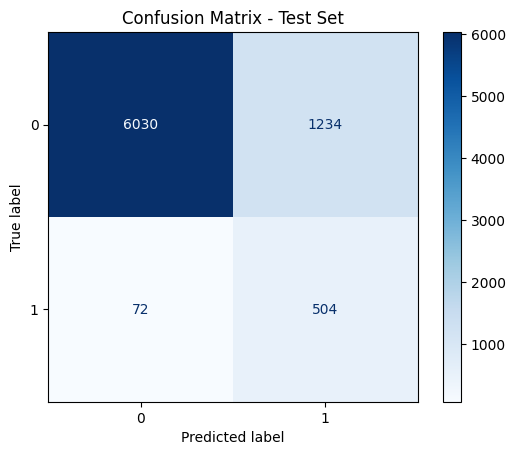

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7264
           1       0.29      0.88      0.44       576

    accuracy                           0.83      7840
   macro avg       0.64      0.85      0.67      7840
weighted avg       0.94      0.83      0.87      7840



In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

Number of weights evaluated: 12


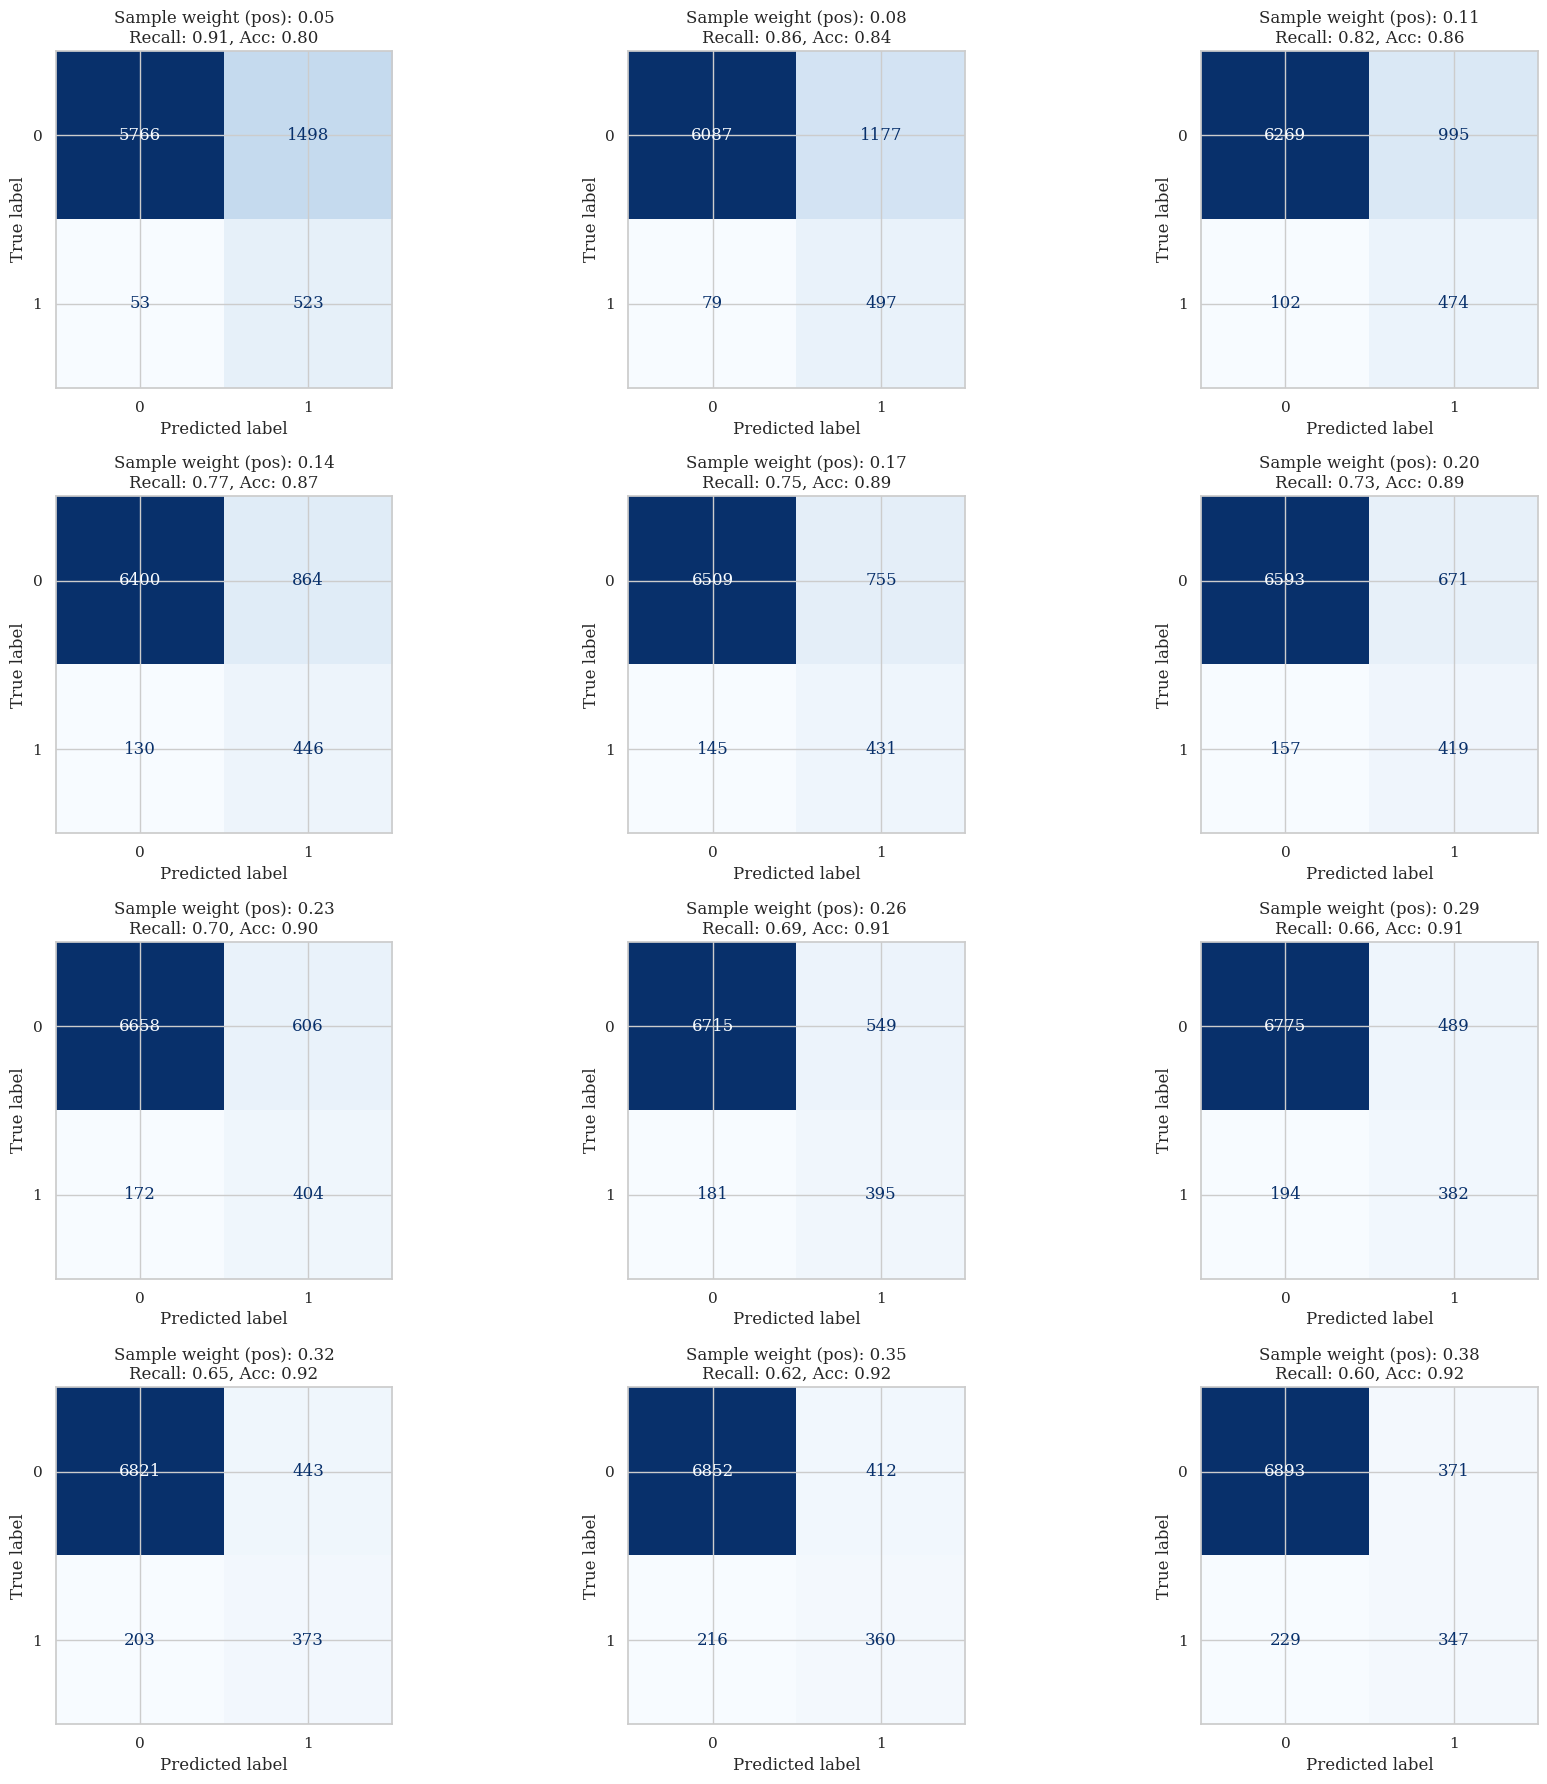

Sample weight (pos): 0.05 | Recall: 0.908 | Accuracy: 0.802
Sample weight (pos): 0.08 | Recall: 0.863 | Accuracy: 0.840
Sample weight (pos): 0.11 | Recall: 0.823 | Accuracy: 0.860
Sample weight (pos): 0.14 | Recall: 0.774 | Accuracy: 0.873
Sample weight (pos): 0.17 | Recall: 0.748 | Accuracy: 0.885
Sample weight (pos): 0.20 | Recall: 0.727 | Accuracy: 0.894
Sample weight (pos): 0.23 | Recall: 0.701 | Accuracy: 0.901
Sample weight (pos): 0.26 | Recall: 0.686 | Accuracy: 0.907
Sample weight (pos): 0.29 | Recall: 0.663 | Accuracy: 0.913
Sample weight (pos): 0.32 | Recall: 0.648 | Accuracy: 0.918
Sample weight (pos): 0.35 | Recall: 0.625 | Accuracy: 0.920
Sample weight (pos): 0.38 | Recall: 0.602 | Accuracy: 0.923


In [25]:
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# Load the best model with optimal hyperparameters
best_xgb = joblib.load('xgb_cls_model_auc_all_features_extra.joblib')

# Prepare test features and labels
X_test = test_data[cls_features]
y_test = test_data['y_encoded']

# Prepare scaler2 for test features
X_test_scaled = scaler2.transform(X_test)

# Store results
weights_list = np.arange(0.05, 0.4, 0.03)
recalls = []
accuracies = []
cms = []

for w in weights_list:
    # Assign sample weights: positive class gets weight 1, negative gets w
    sample_weights = np.where(y_train_cls == 1, 1, w)
    # Fit a new model with the same hyperparameters but different sample weights
    model = joblib.load('xgb_cls_model_auc_all_features_extra.joblib')
    model.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)
    y_pred = model.predict(X_test_scaled)
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

len_weights = len(weights_list)
print(f"Number of weights evaluated: {len_weights}")


# Plot confusion matrices

fig, axes = plt.subplots(4, 3, figsize=(18, 18))
axes = axes.flatten()
for idx, (w, cm) in enumerate(zip(weights_list, cms)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'Sample weight (pos): {w:.2f}\nRecall: {recalls[idx]:.2f}, Acc: {accuracies[idx]:.2f}')
plt.tight_layout()
plt.show()



# Optionally, print recall and accuracy for each weight
for idx, w in enumerate(weights_list):
    print(f"Sample weight (pos): {w:.2f} | Recall: {recalls[idx]:.3f} | Accuracy: {accuracies[idx]:.3f}")

In [27]:
import math
import pandas as pd

# Define mapping from dummy columns to original categorical features
cat_groups = {
    'marital': ['marital_married', 'marital_single'],
    'education': ['education_secondary', 'education_tertiary', 'education_unknown'],
    'default': ['default_yes'],
    'housing': ['housing_yes'],
    'loan': ['loan_yes'],
    'age_group': ['age_group_age_42_to_60', 'age_group_over_60', 'age_group_under_33'],
    'balance_group': [
        'balance_group_balance_2000_to_4000',
        'balance_group_balance_750_to_2000',
        'balance_group_balance_over_4000',
        'balance_group_balance_under_0'
    ],
    'job_group': ['job_group_manual_labor', 'job_group_not_working', 'job_group_office_support'],
    'campaign_category_v2': [
        'campaign_category_v2_campaign_2',
        'campaign_category_v2_campaign_3',
        'campaign_category_v2_campaign_gt10',
        'campaign_category_v2_campaign_mt3_lt11'
    ],
    'month_period': ['month_period_mid_year', 'month_period_start_year']
}


# 2. Convert dummies back to categorical and bin numeric feature
cat_groups['duration_cat'] = []  # Add duration_cat to cat_groups for plotting
duration_bins = [-0.95, 2, 5, test_data['duration'].max()]
duration_labels = ['short', 'medium', 'long']
df_cat = test_data.copy()
df_cat['duration_cat'] = pd.cut(df_cat['duration'], bins=duration_bins, labels=duration_labels, ordered=True)

def dummies_to_category(row, group, columns):
    for col in columns:
        if col in row and row[col]:
            return col.replace(f"{group}_", "")
    return f"{group}_base"

for group, columns in cat_groups.items():
    if columns:
        df_cat[group] = df_cat.apply(lambda row: dummies_to_category(row, group, columns), axis=1)

cat_features = list(cat_groups.keys()) + ['duration_cat']
n_features = len(cat_features)
ncols = math.ceil(math.sqrt(n_features))
nrows = math.ceil(n_features / ncols)


C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

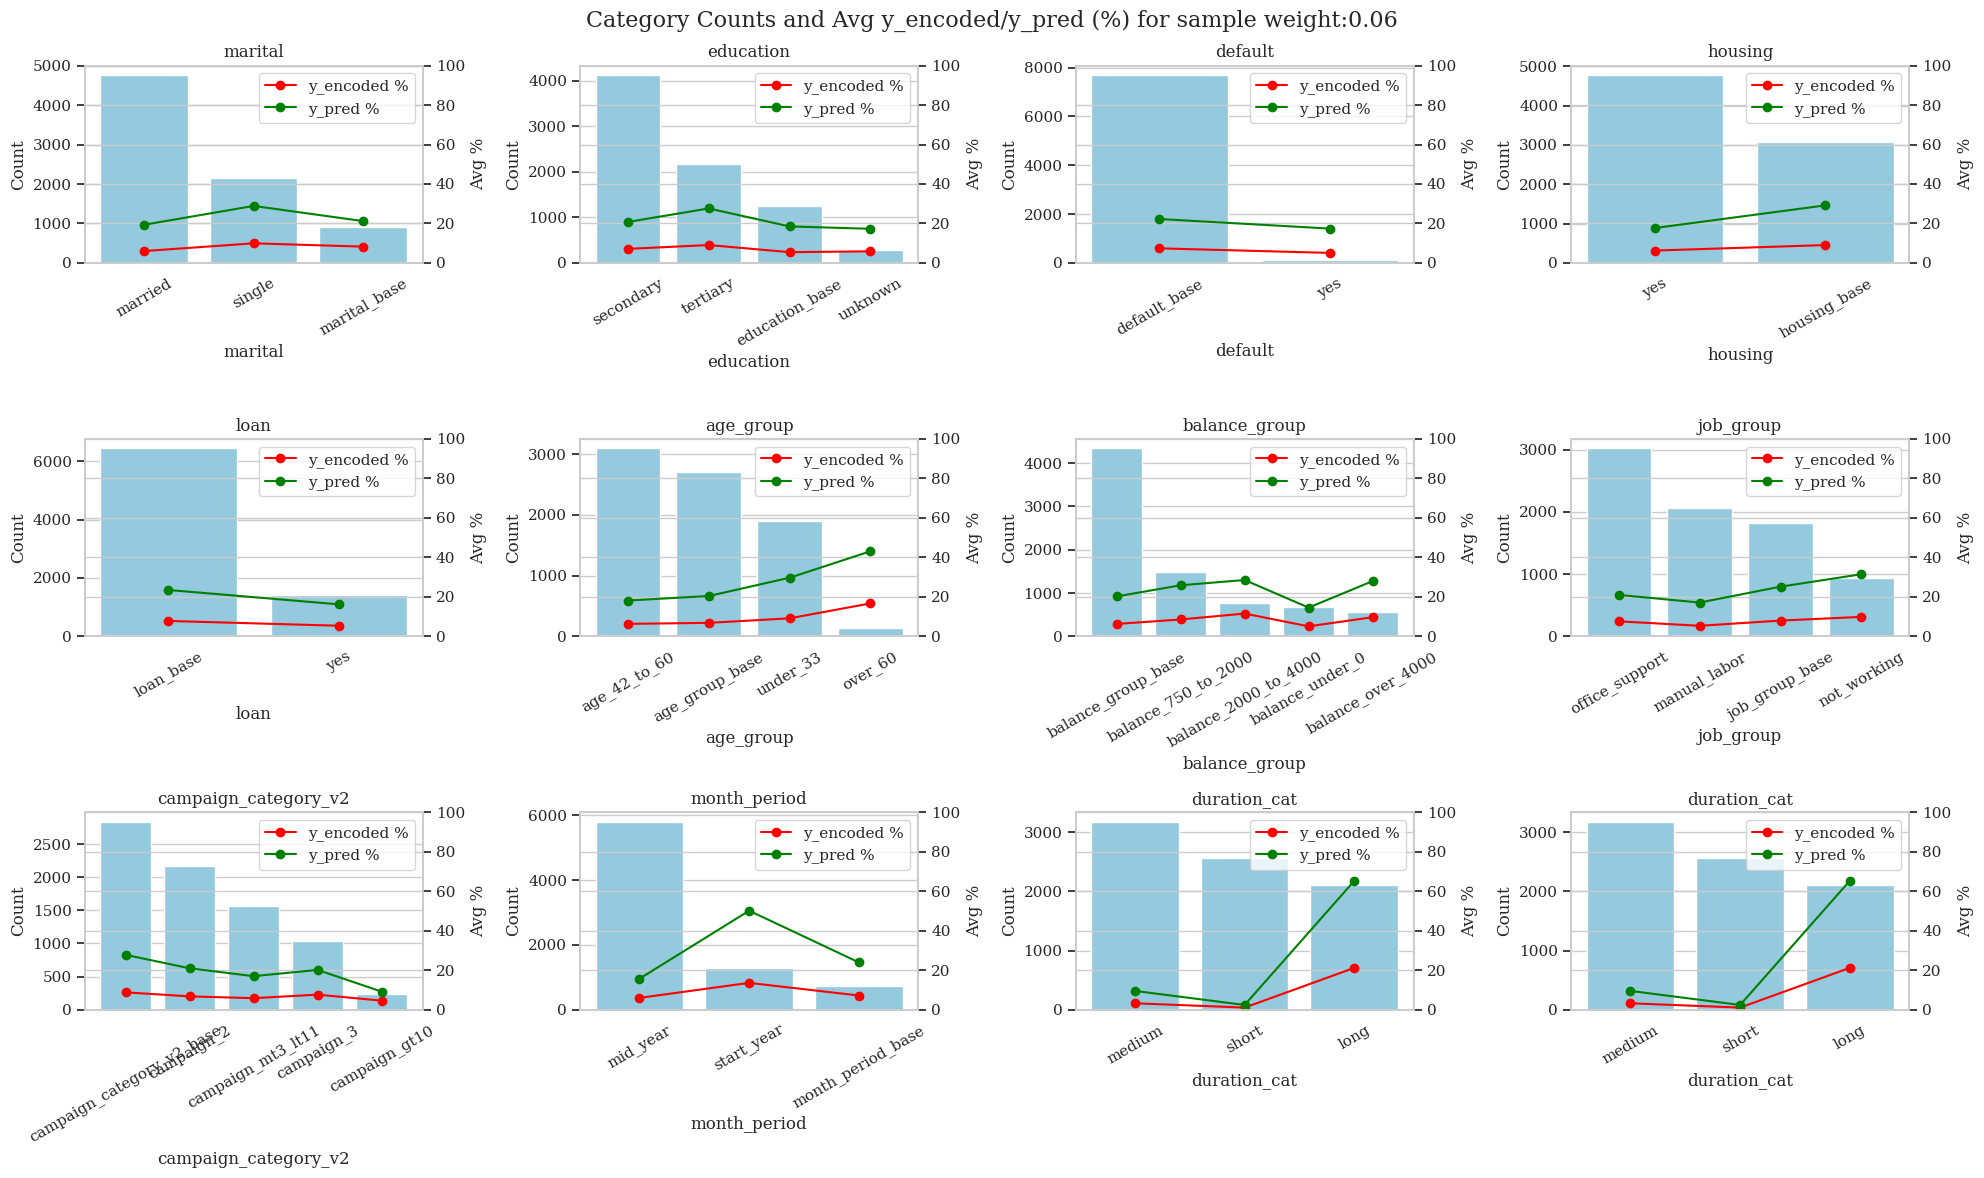

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

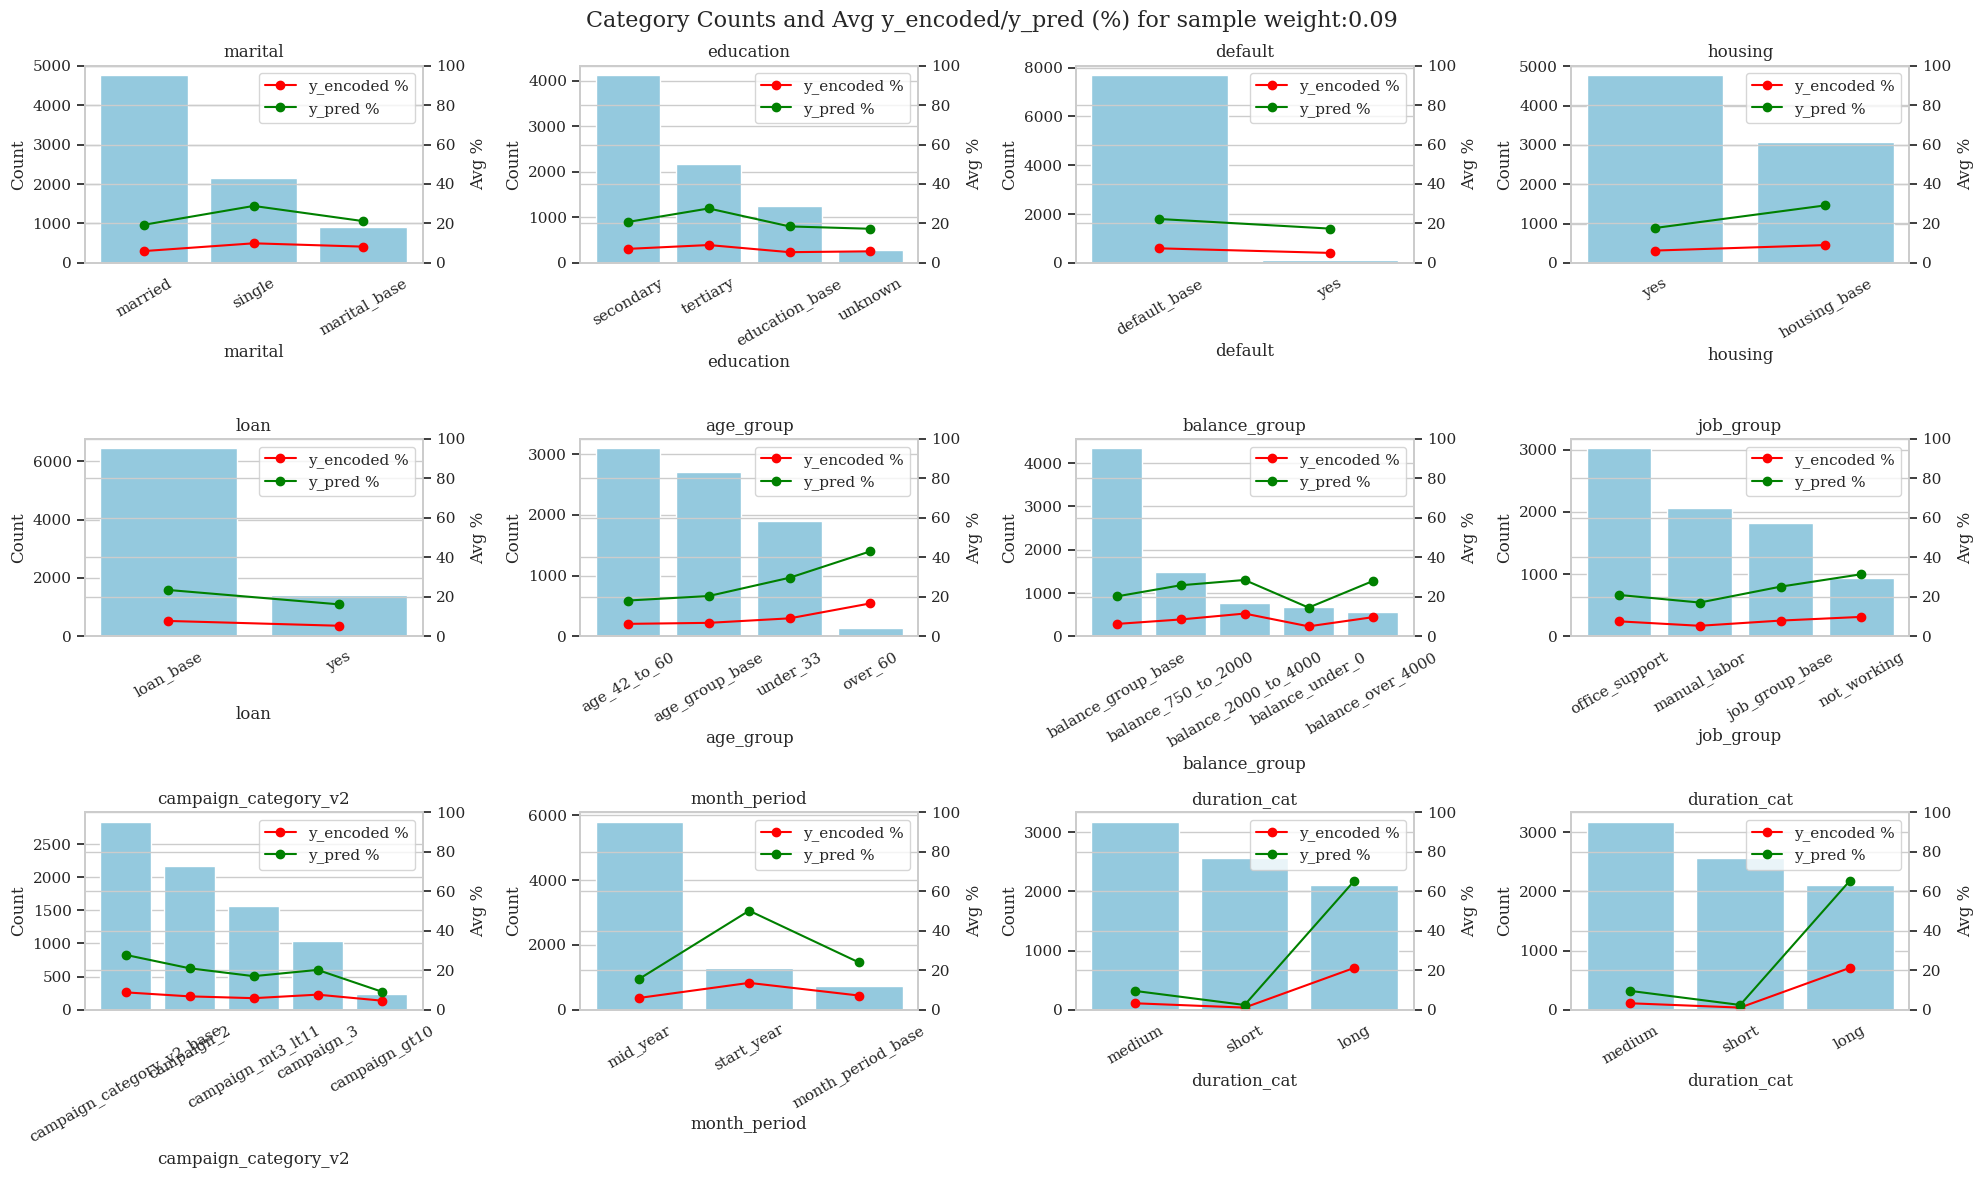

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

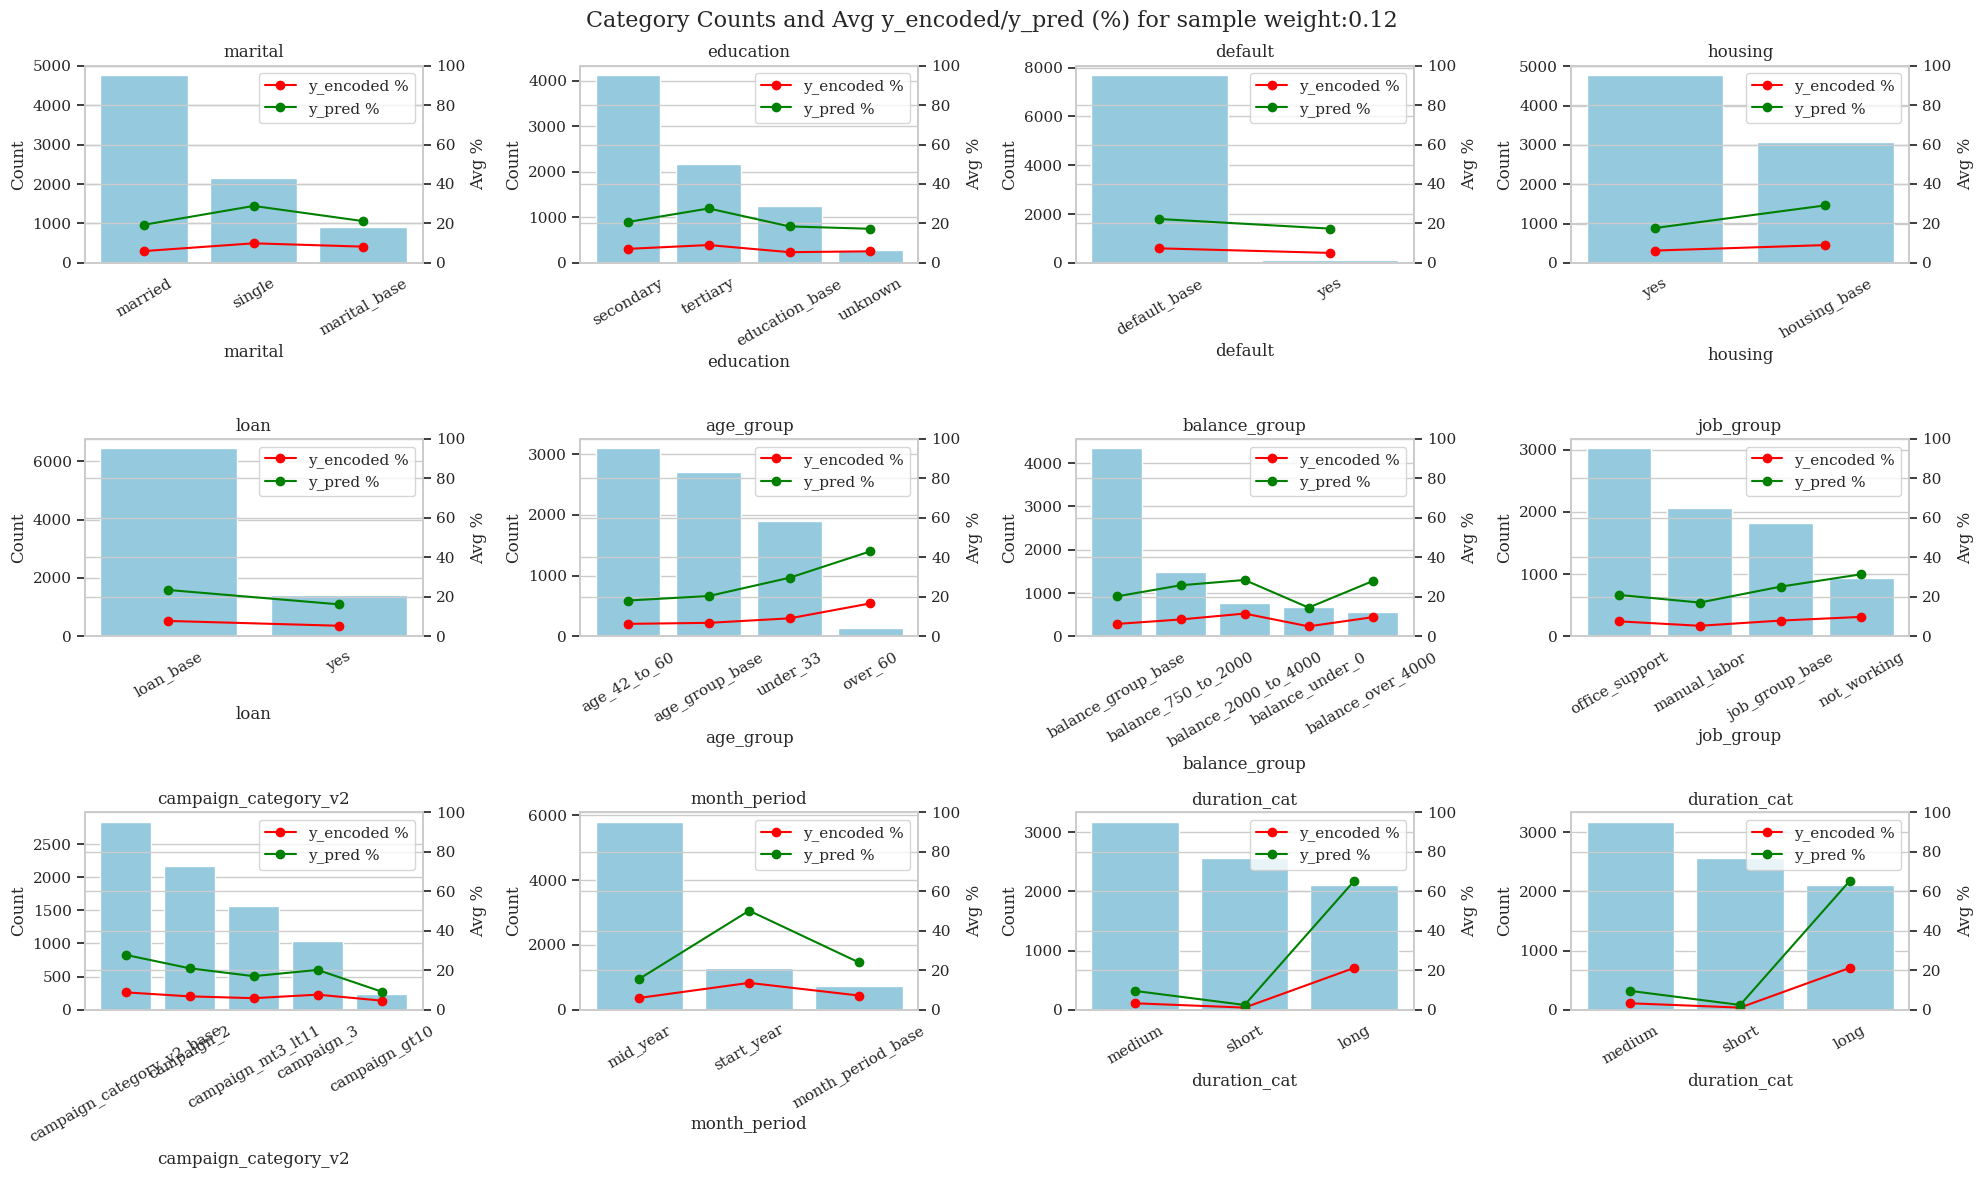

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

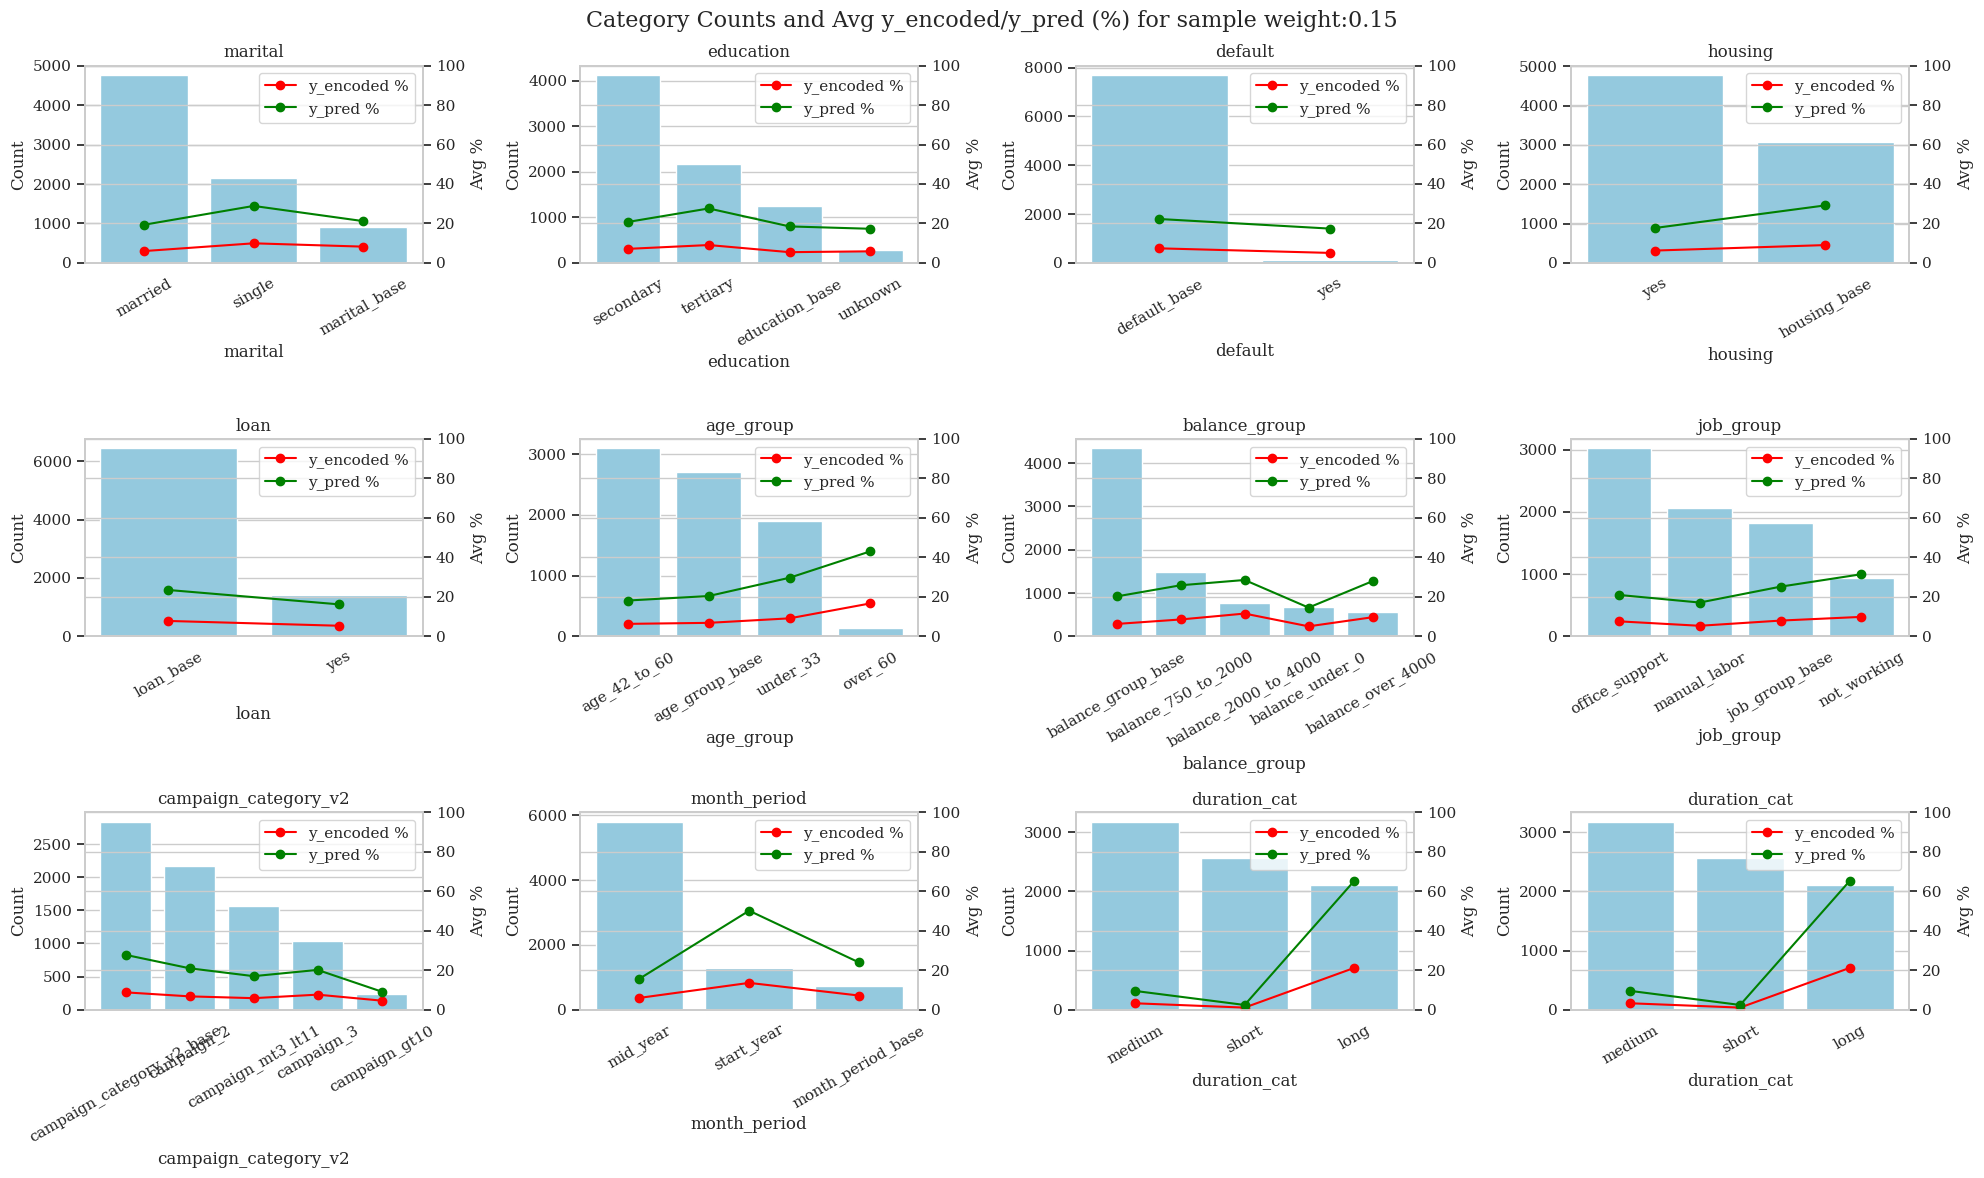

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

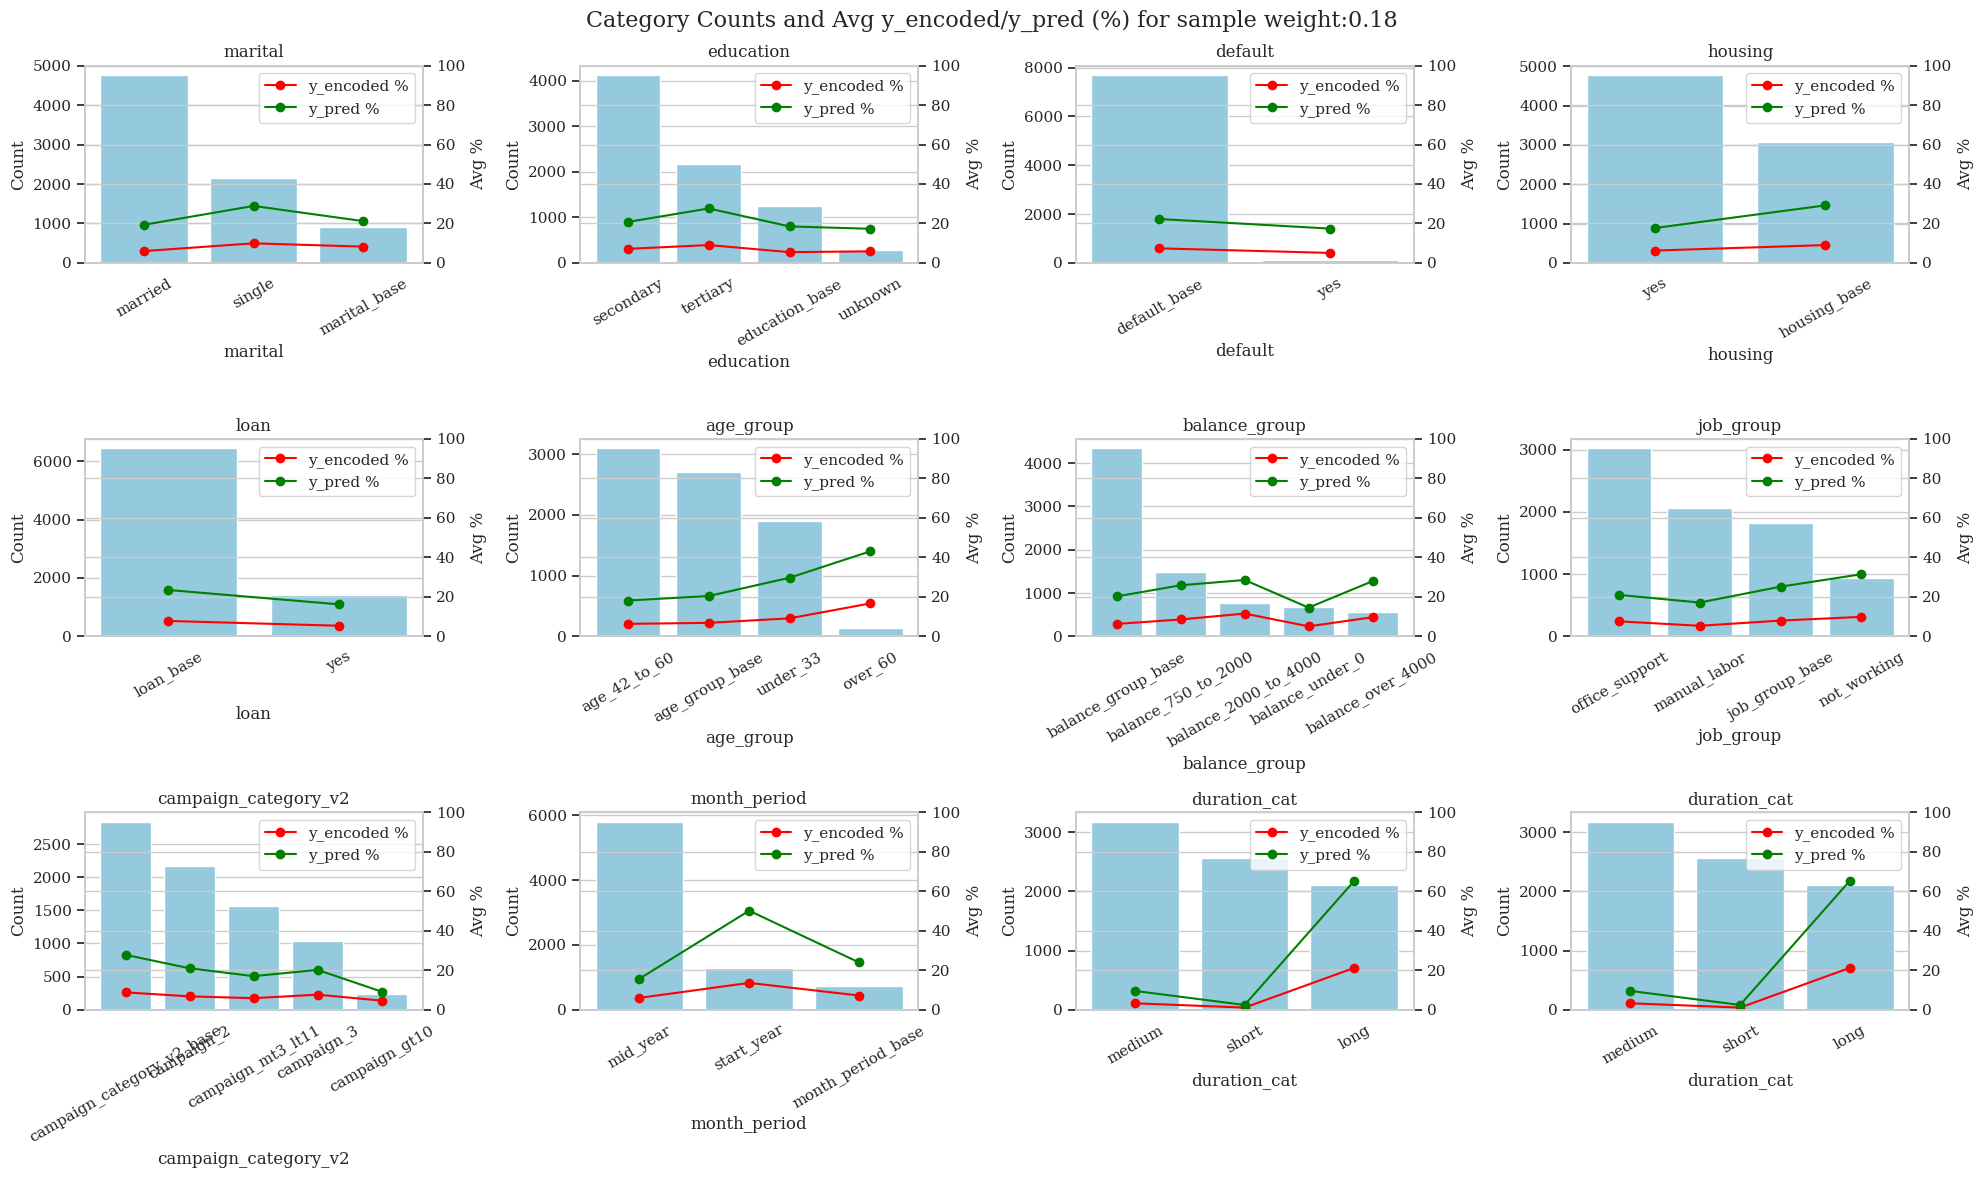

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

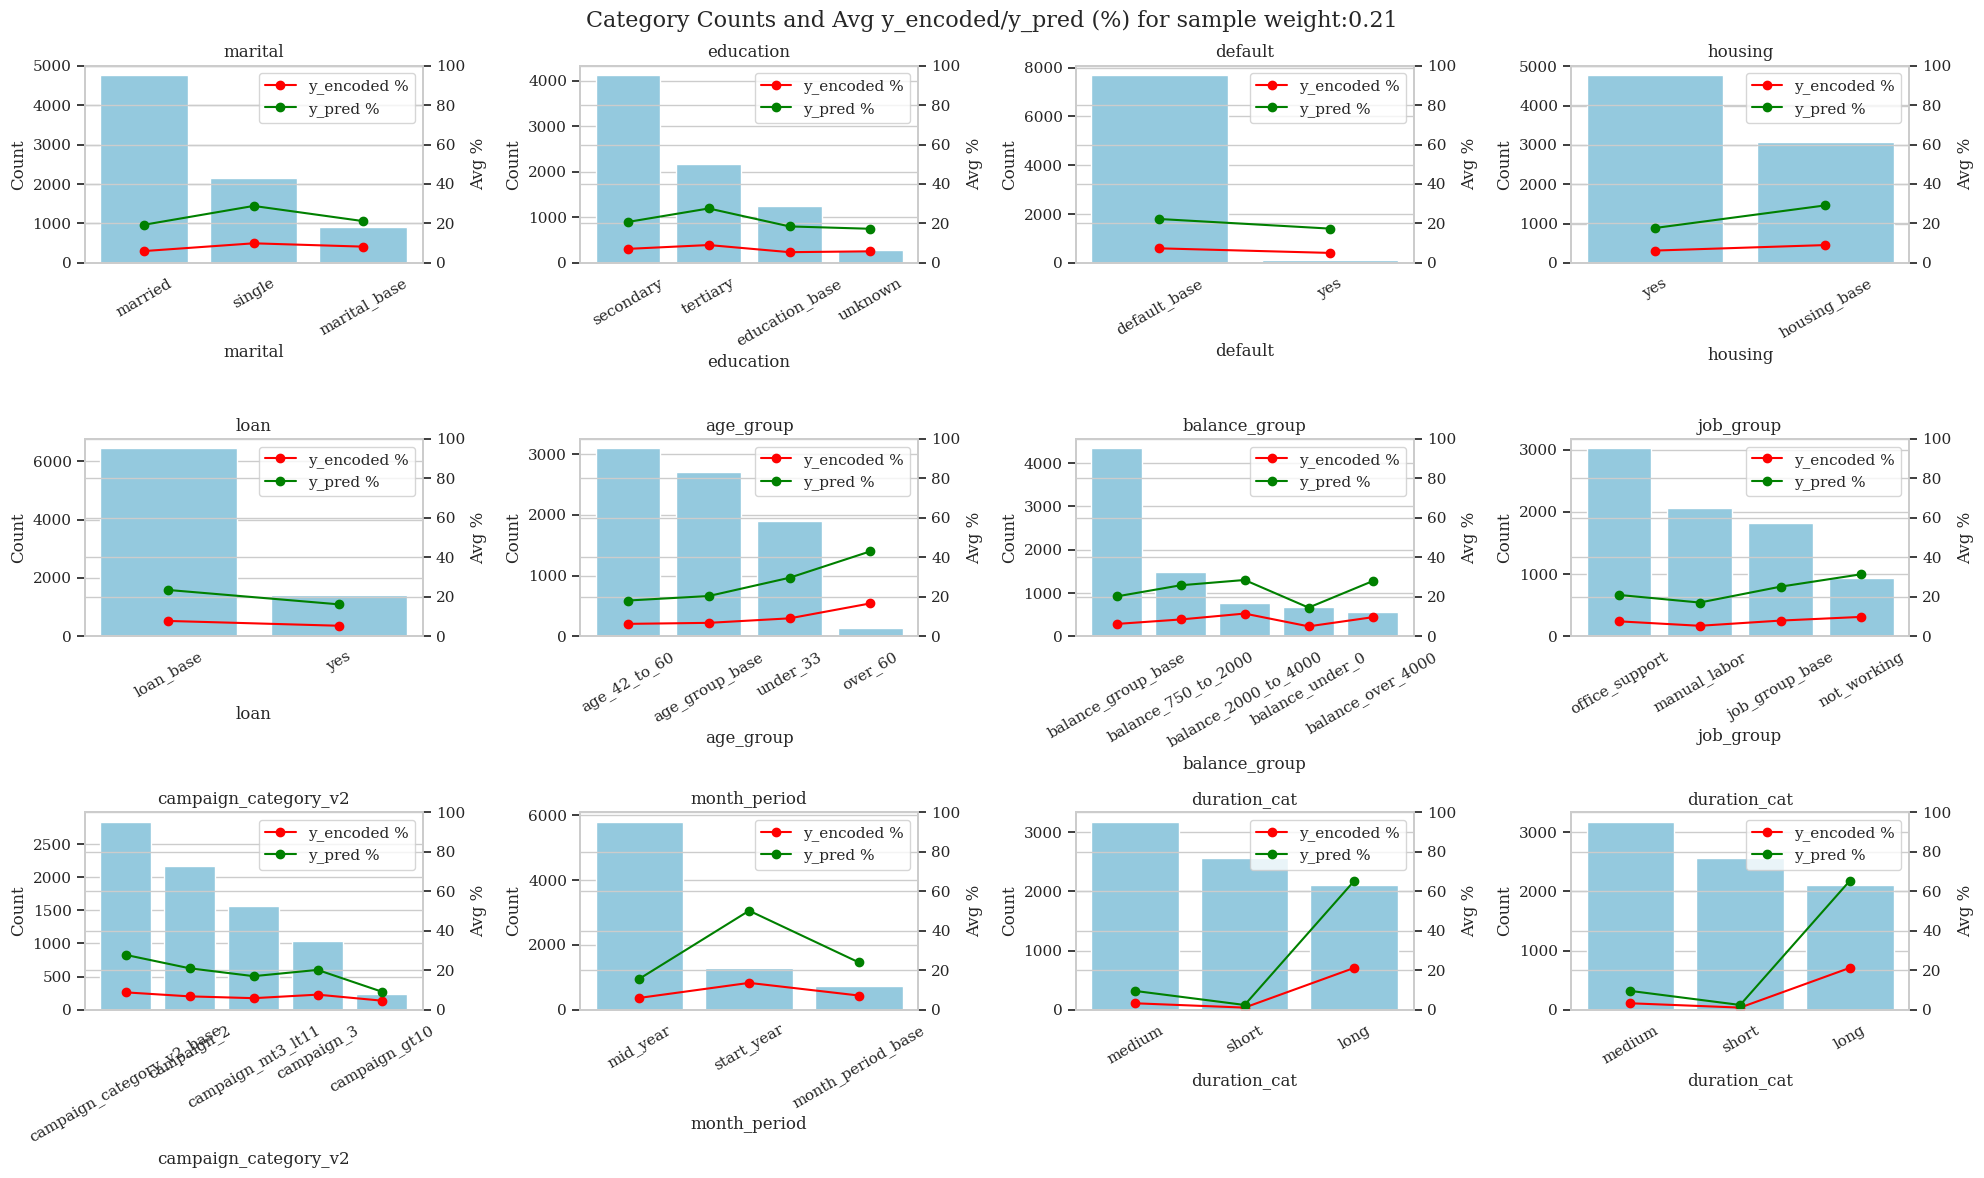

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

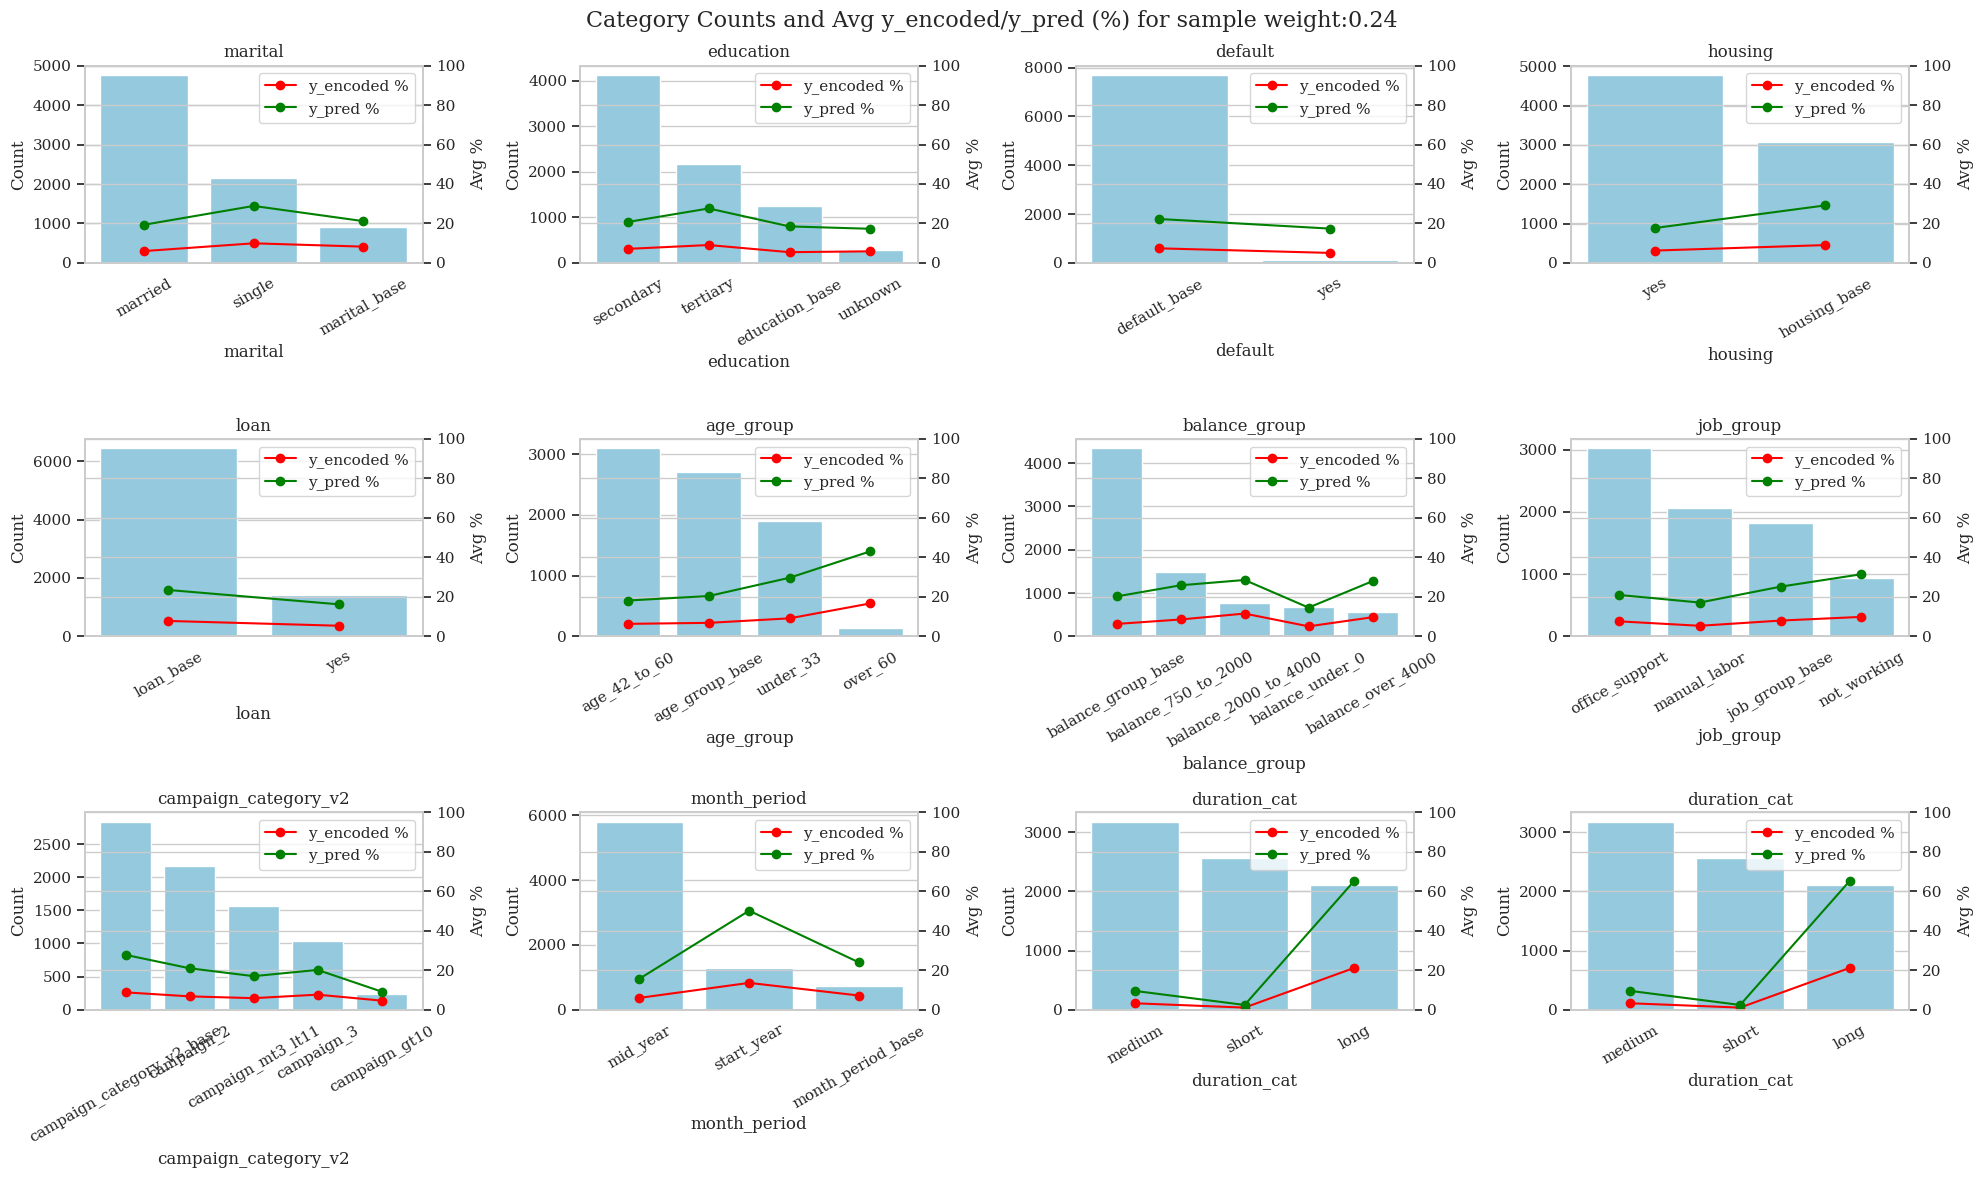

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

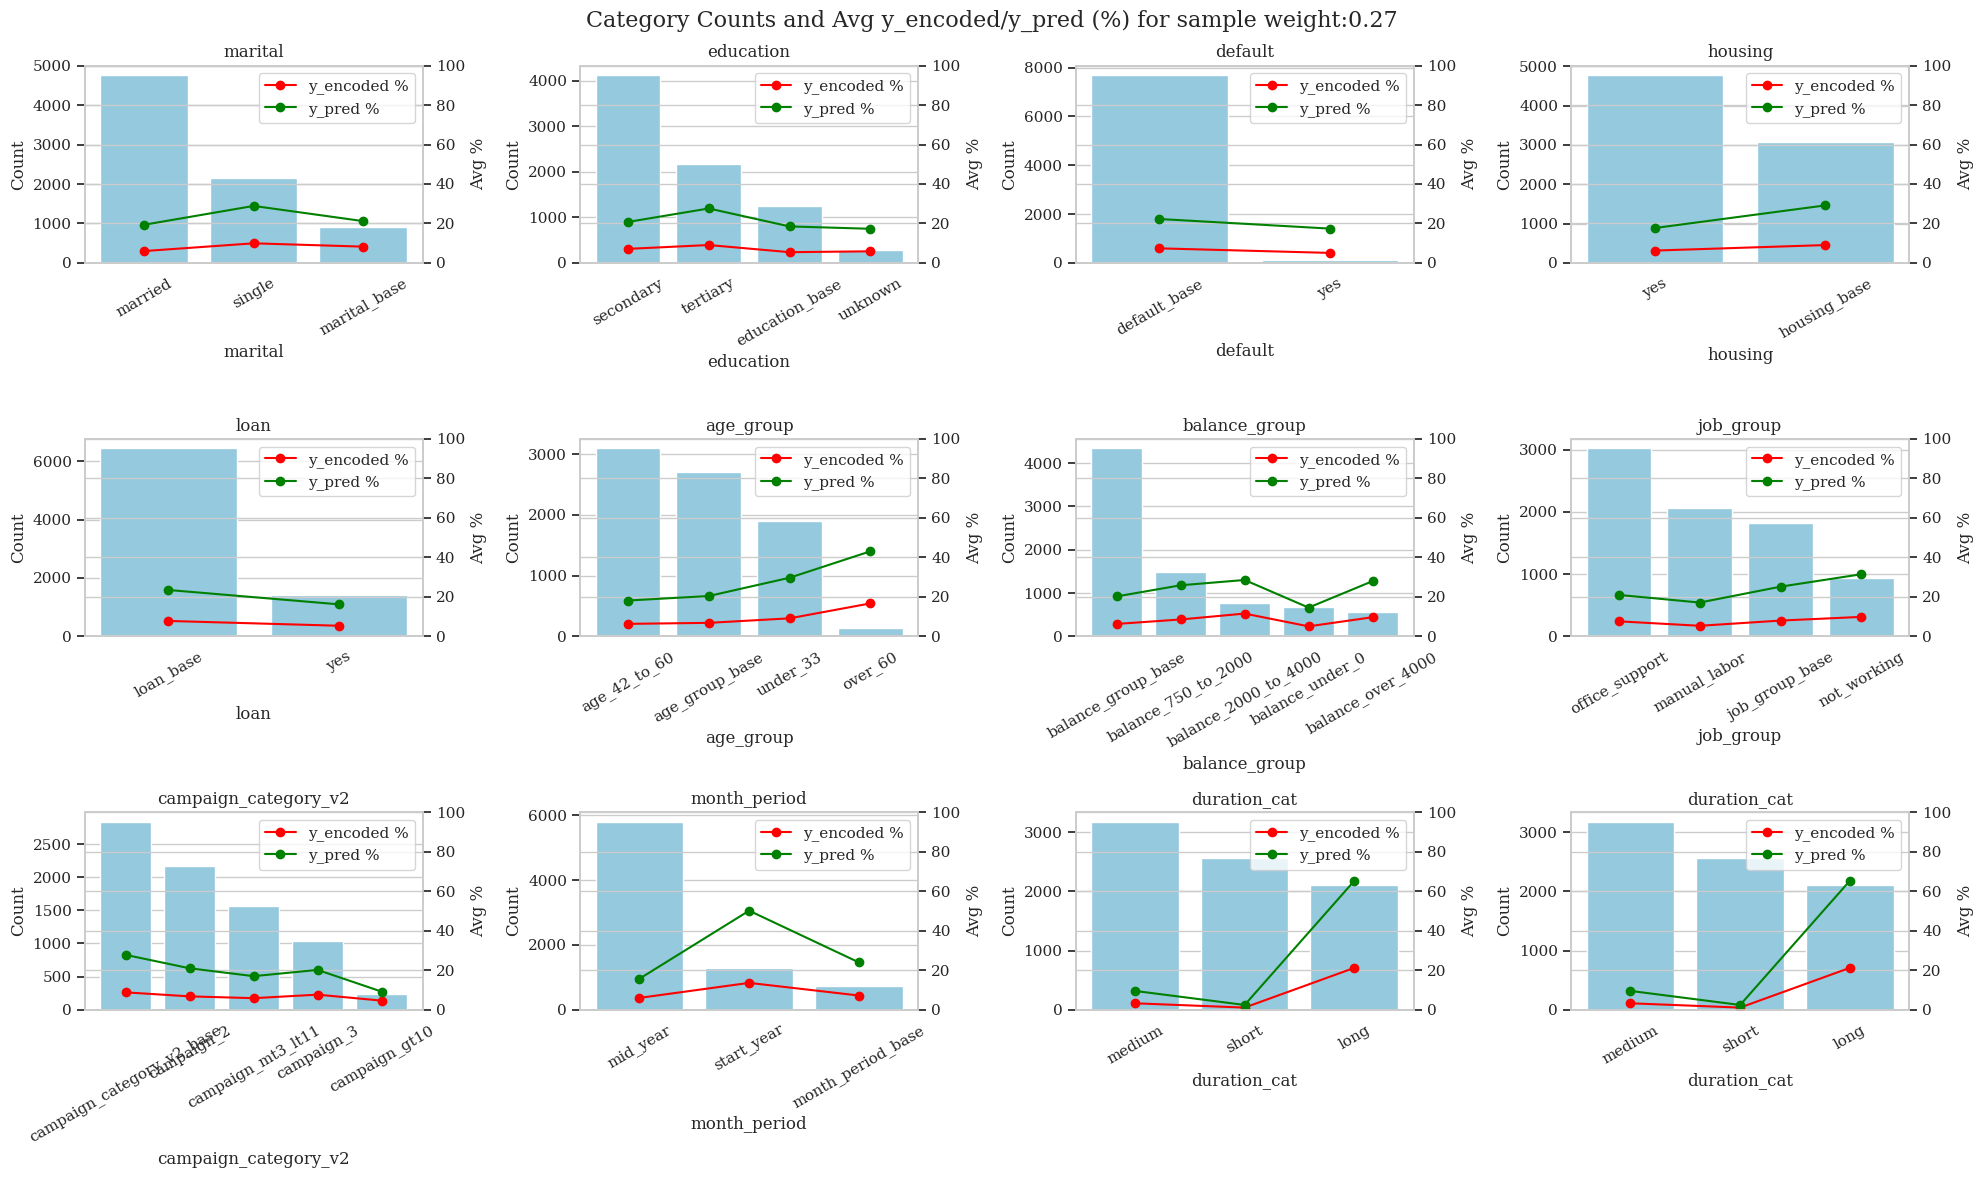

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

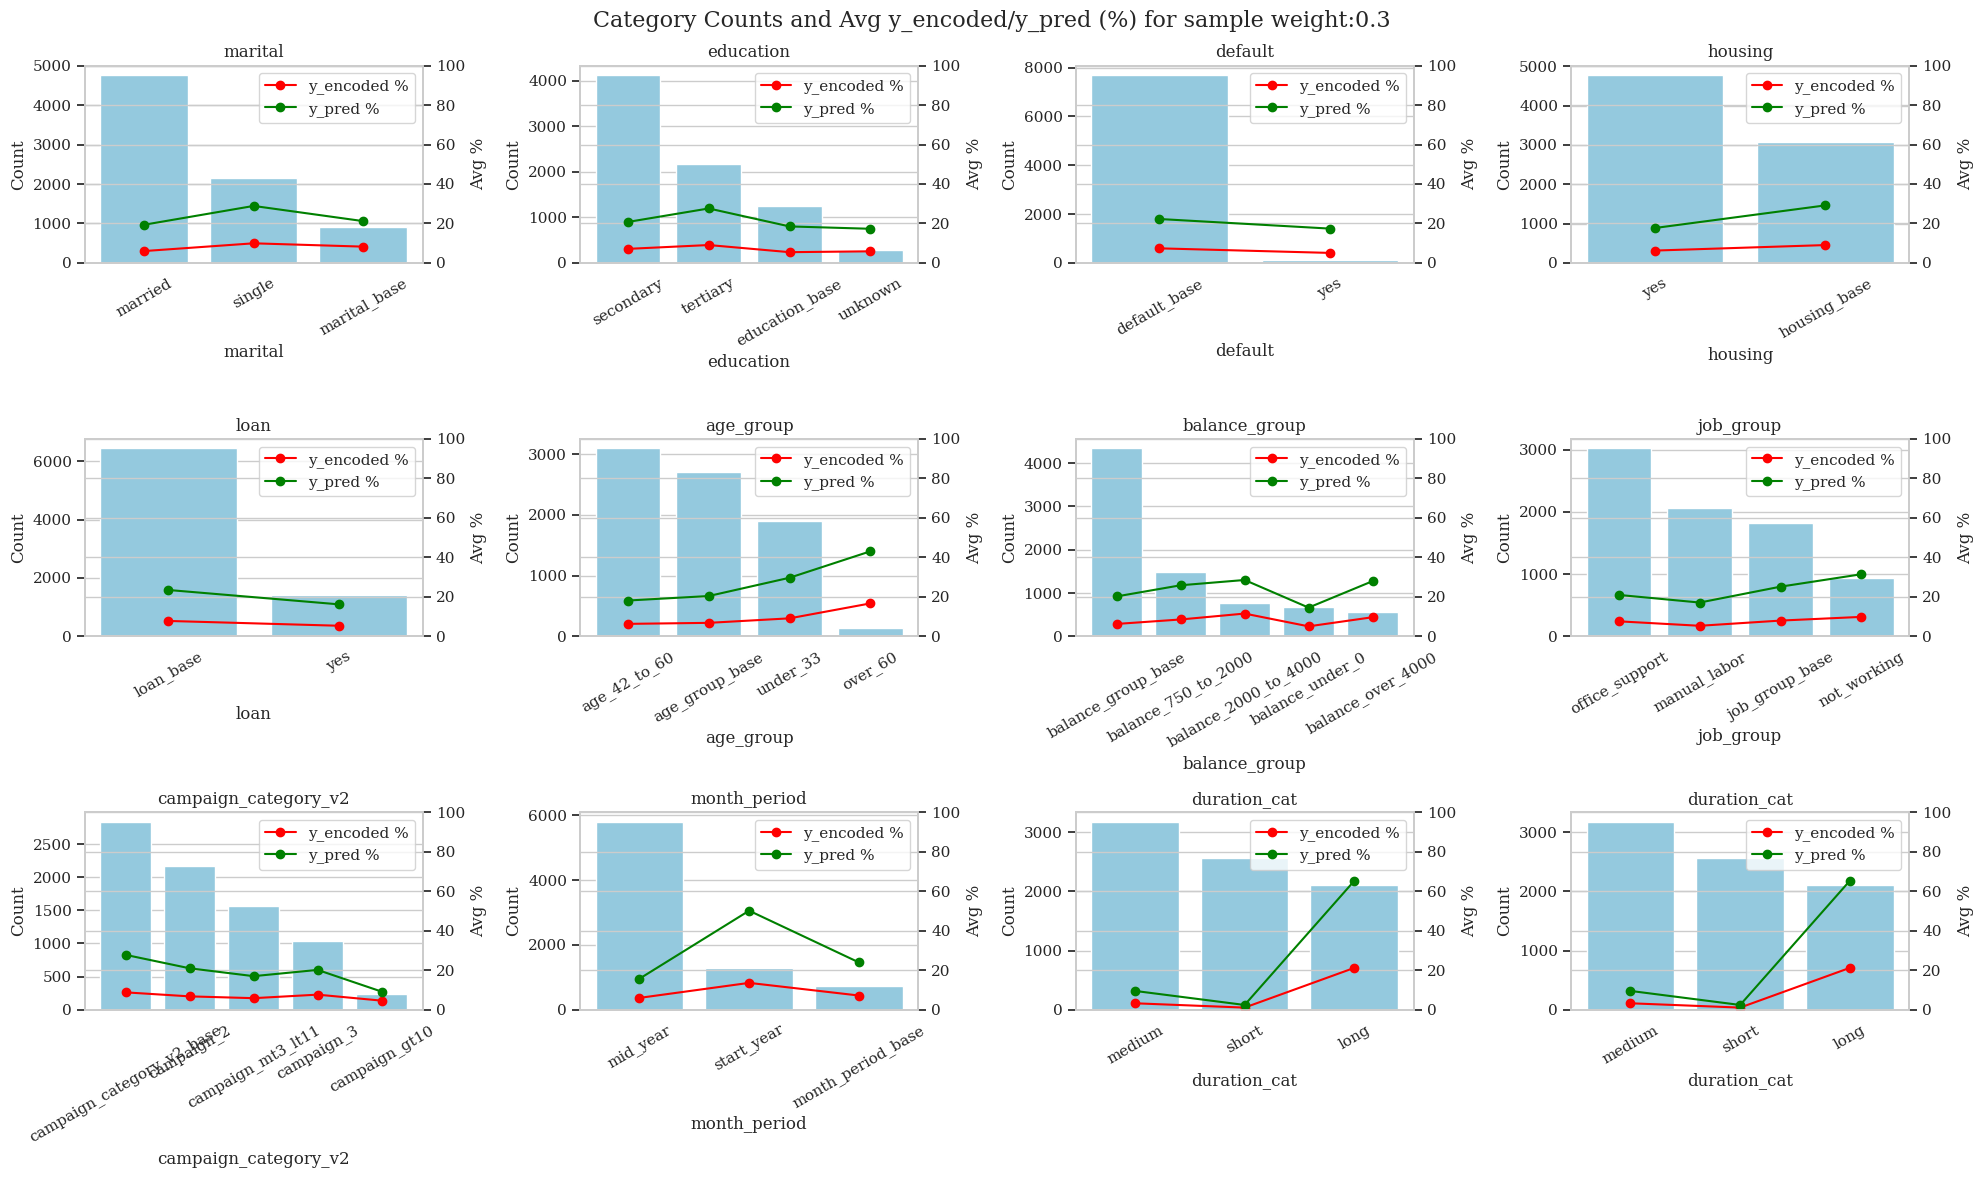

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

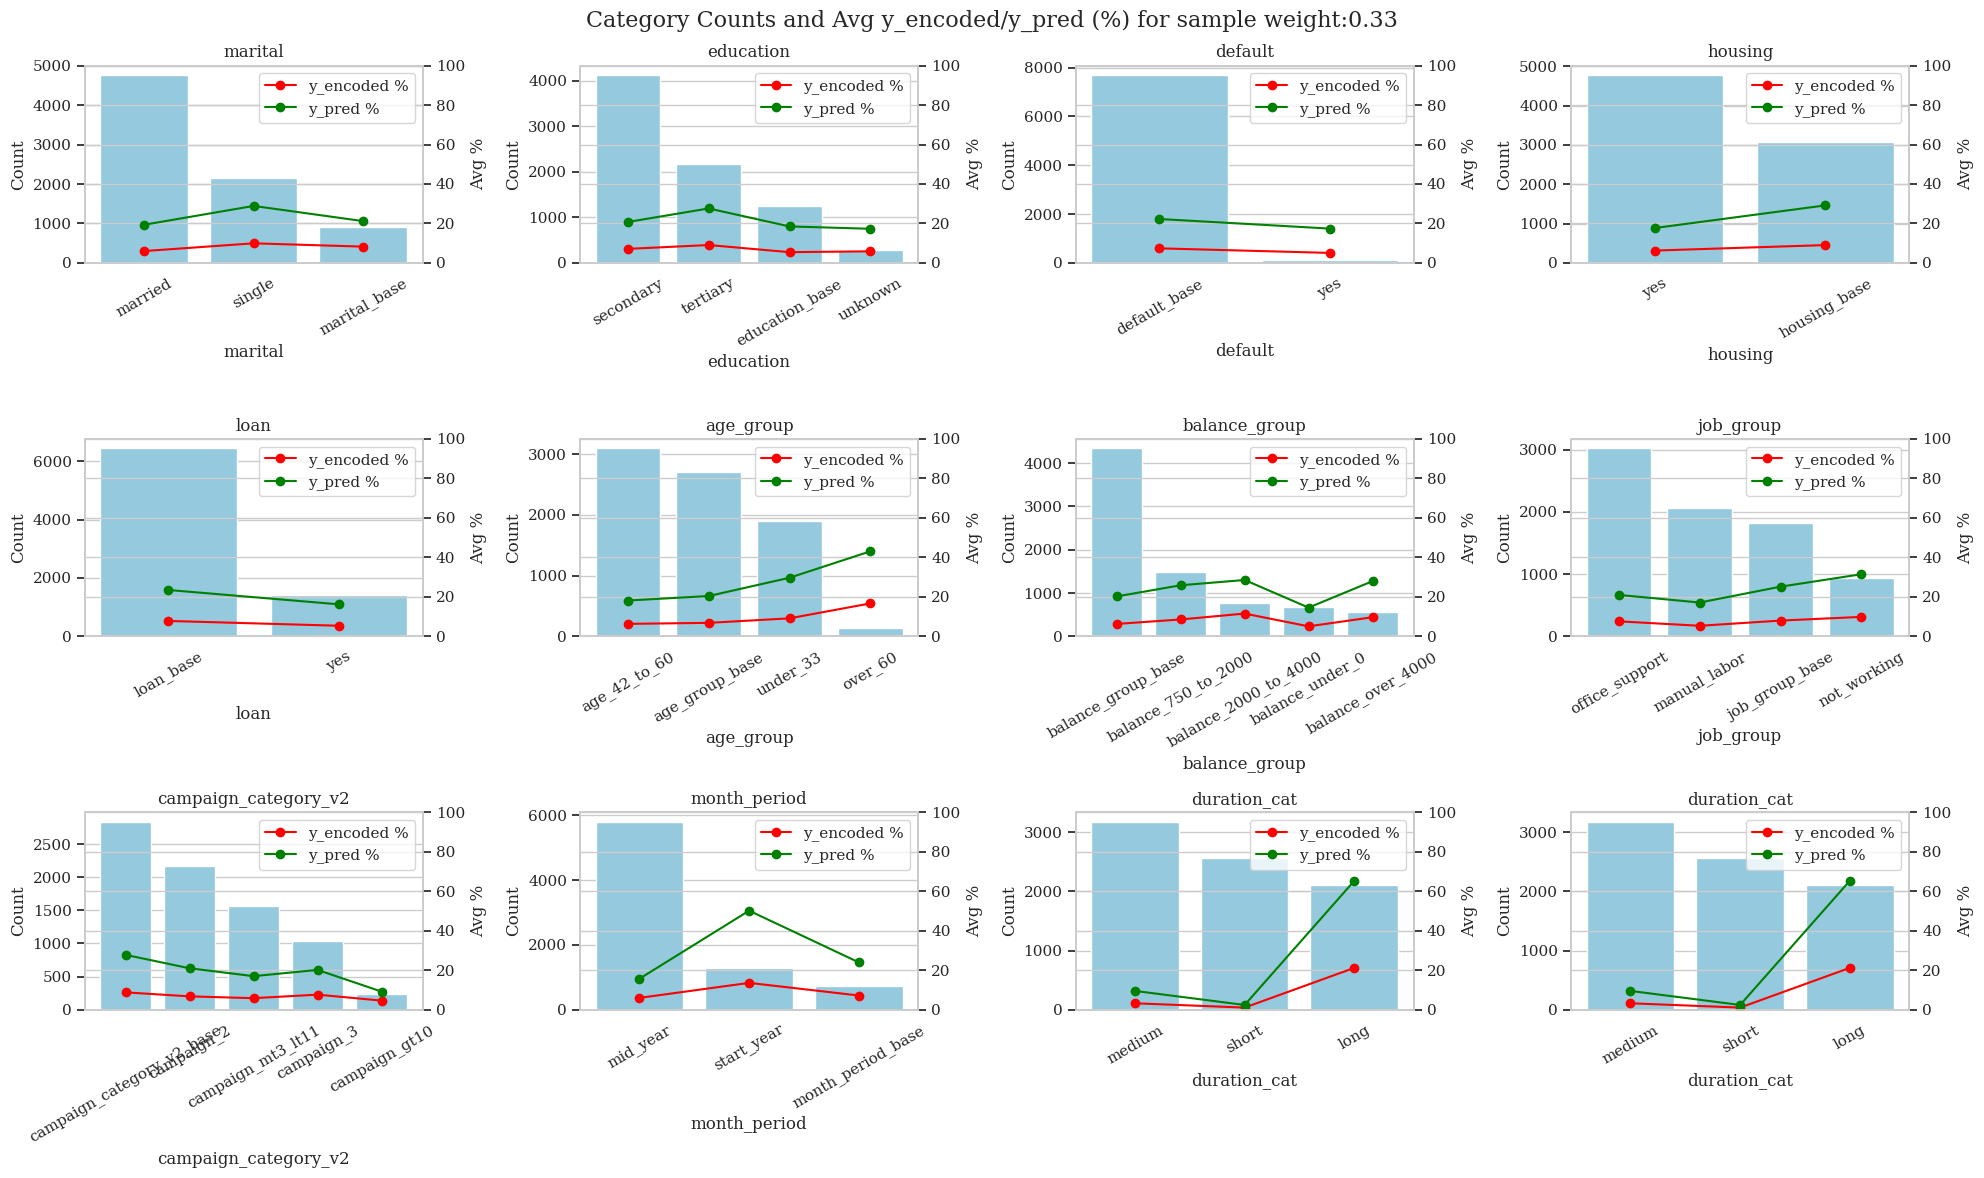

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

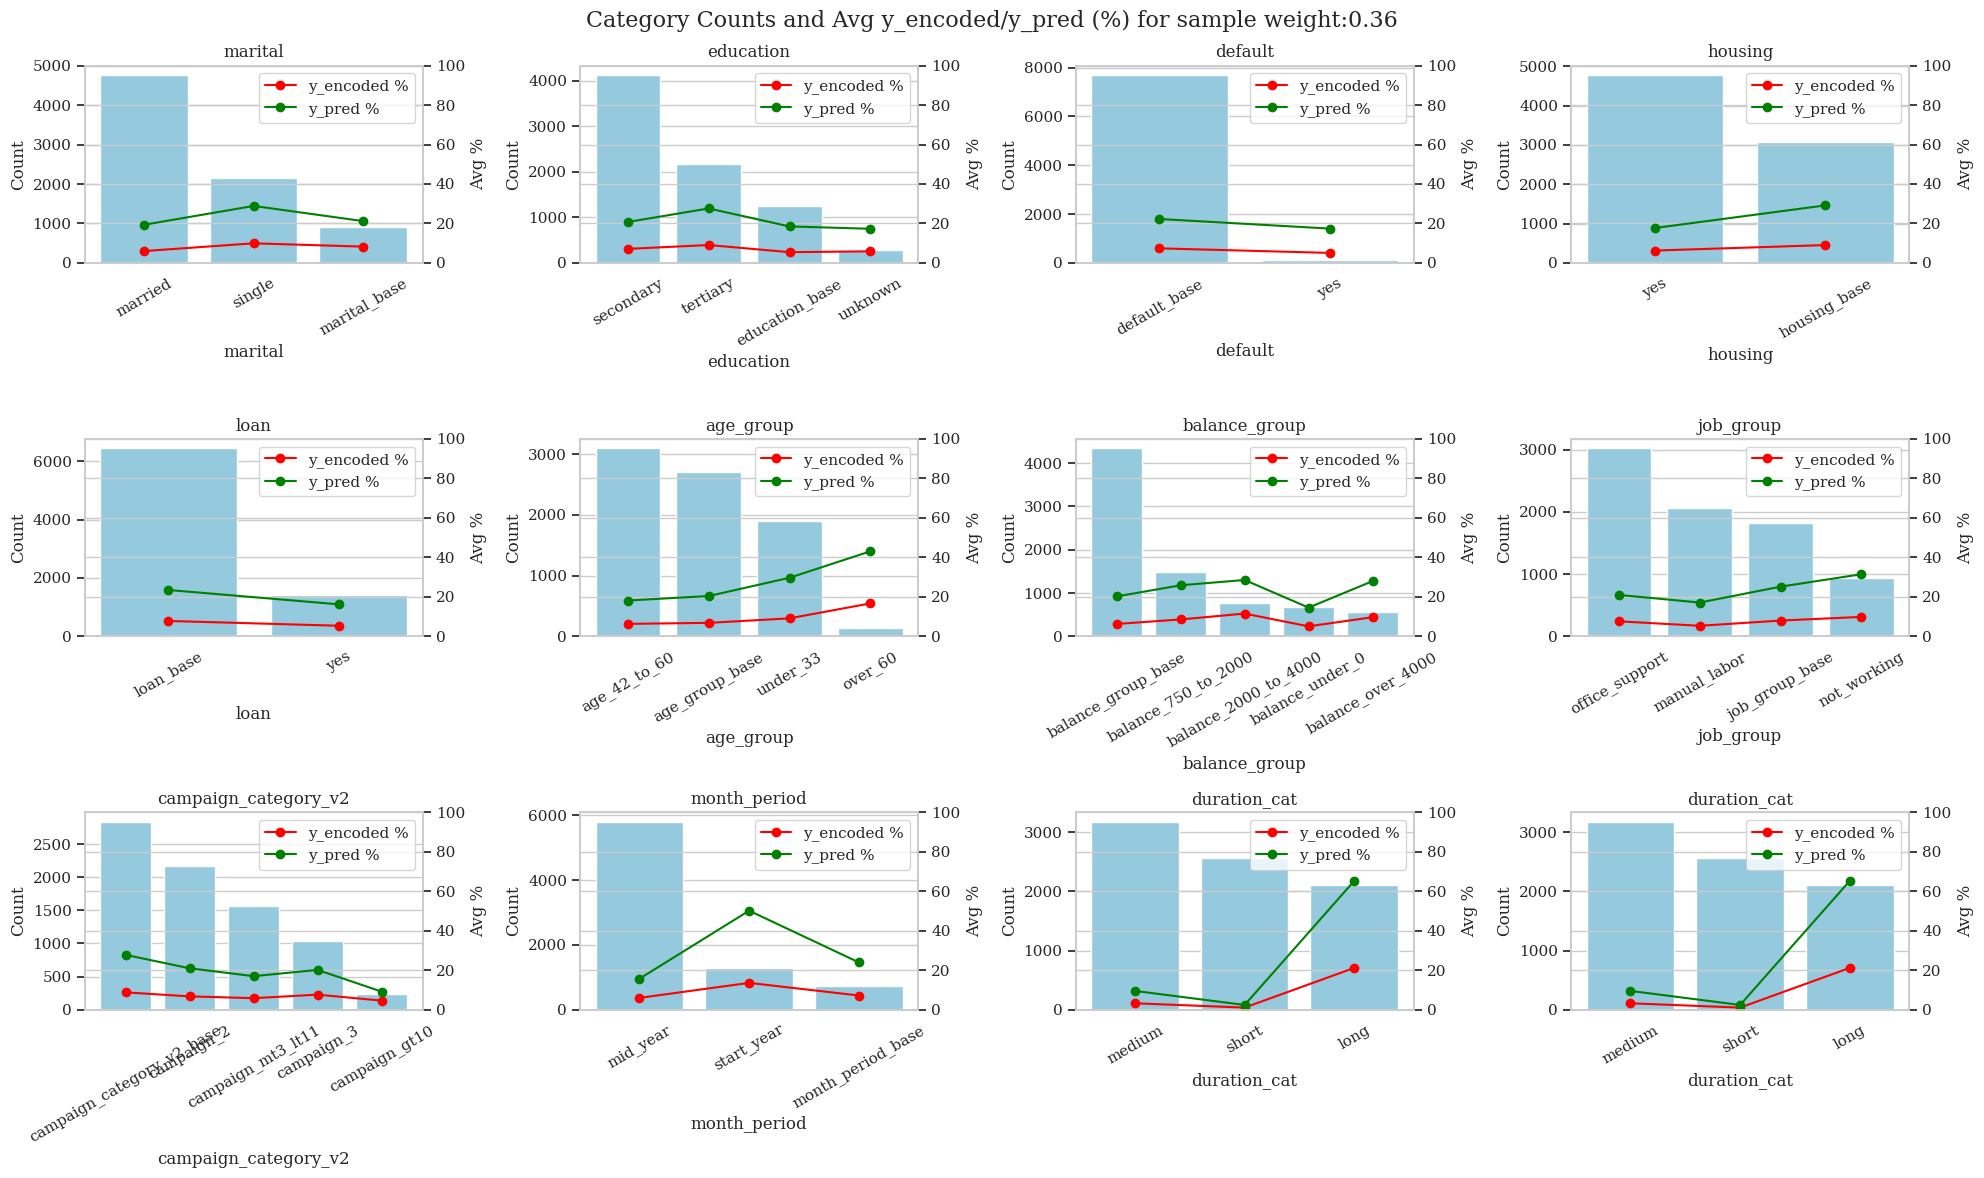

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

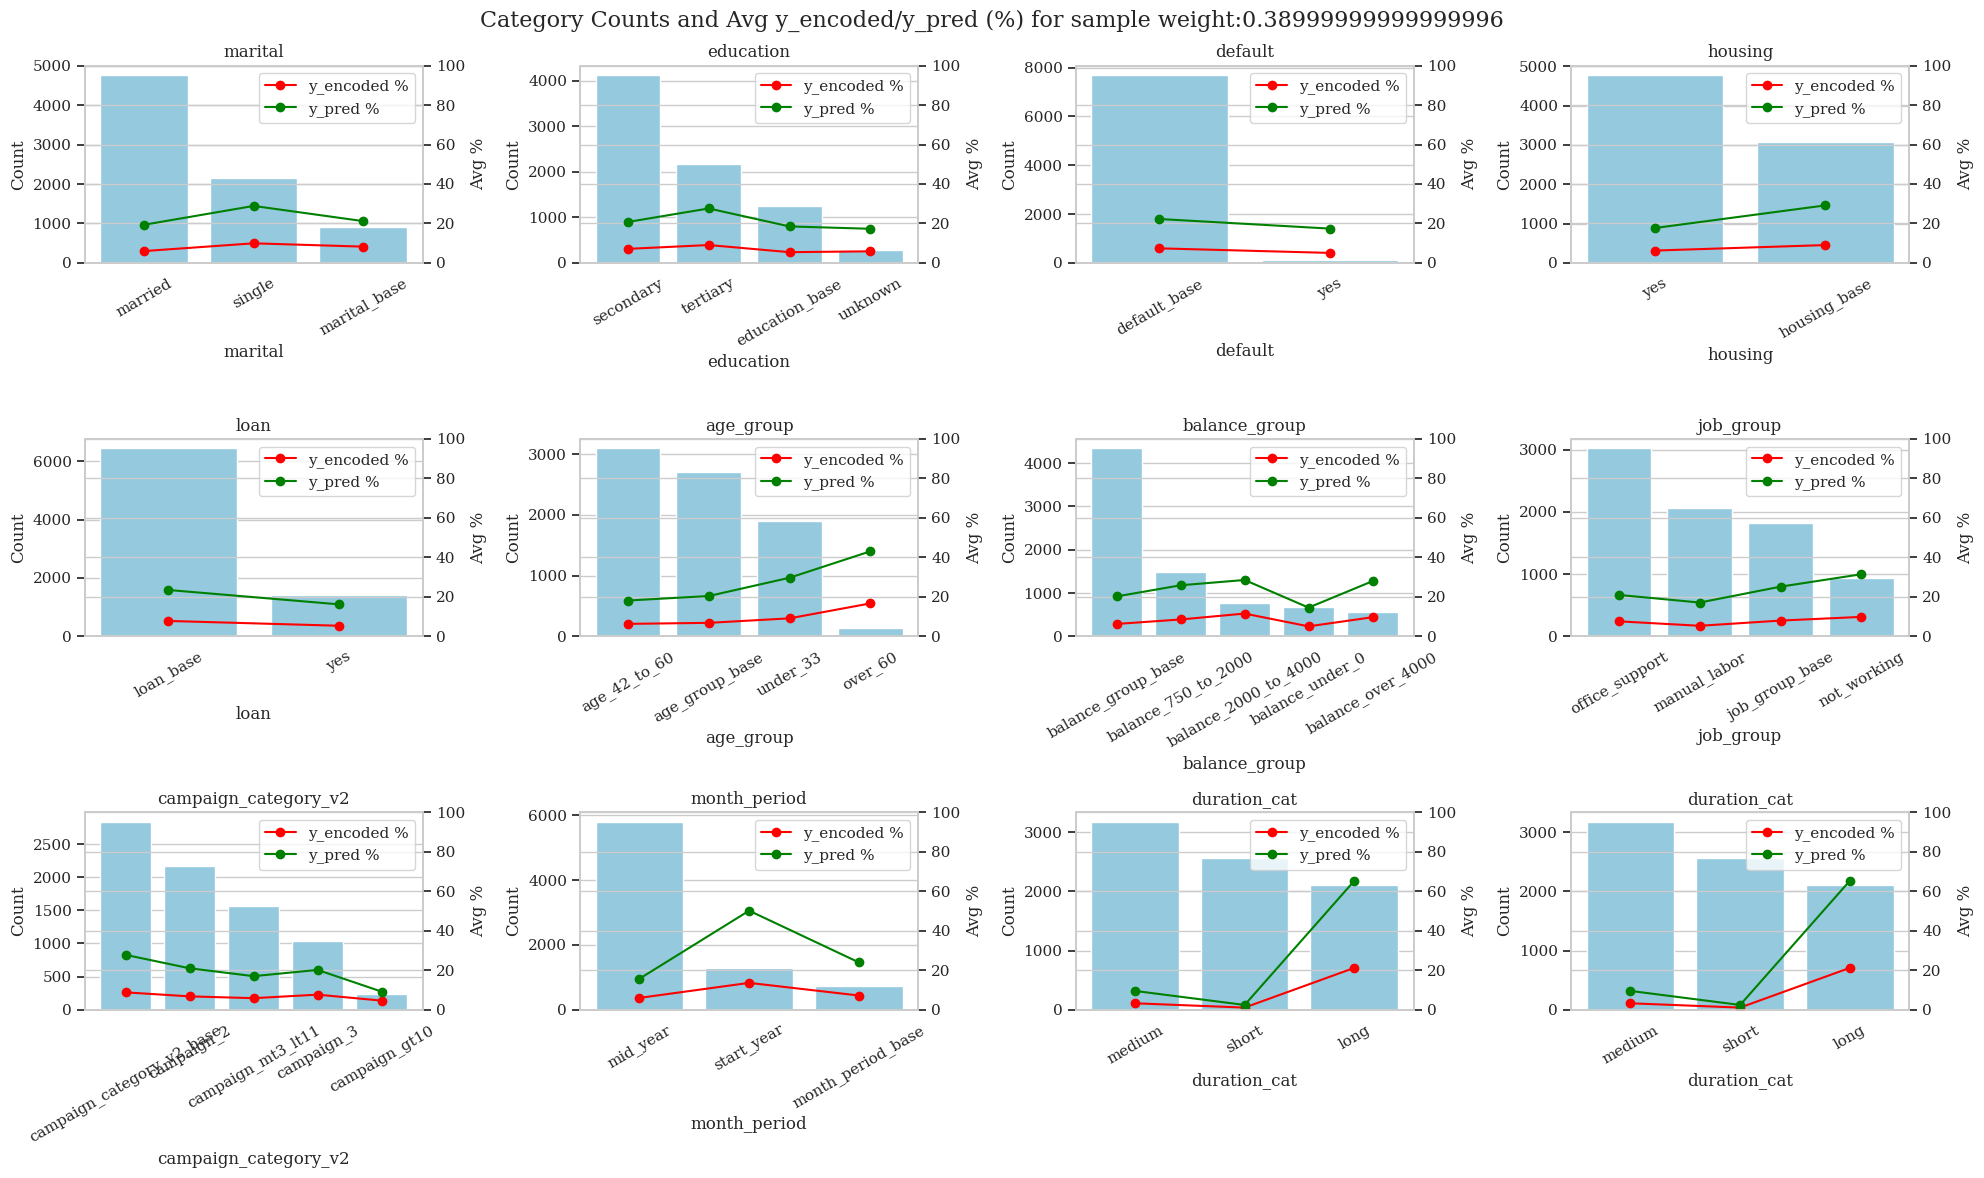

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

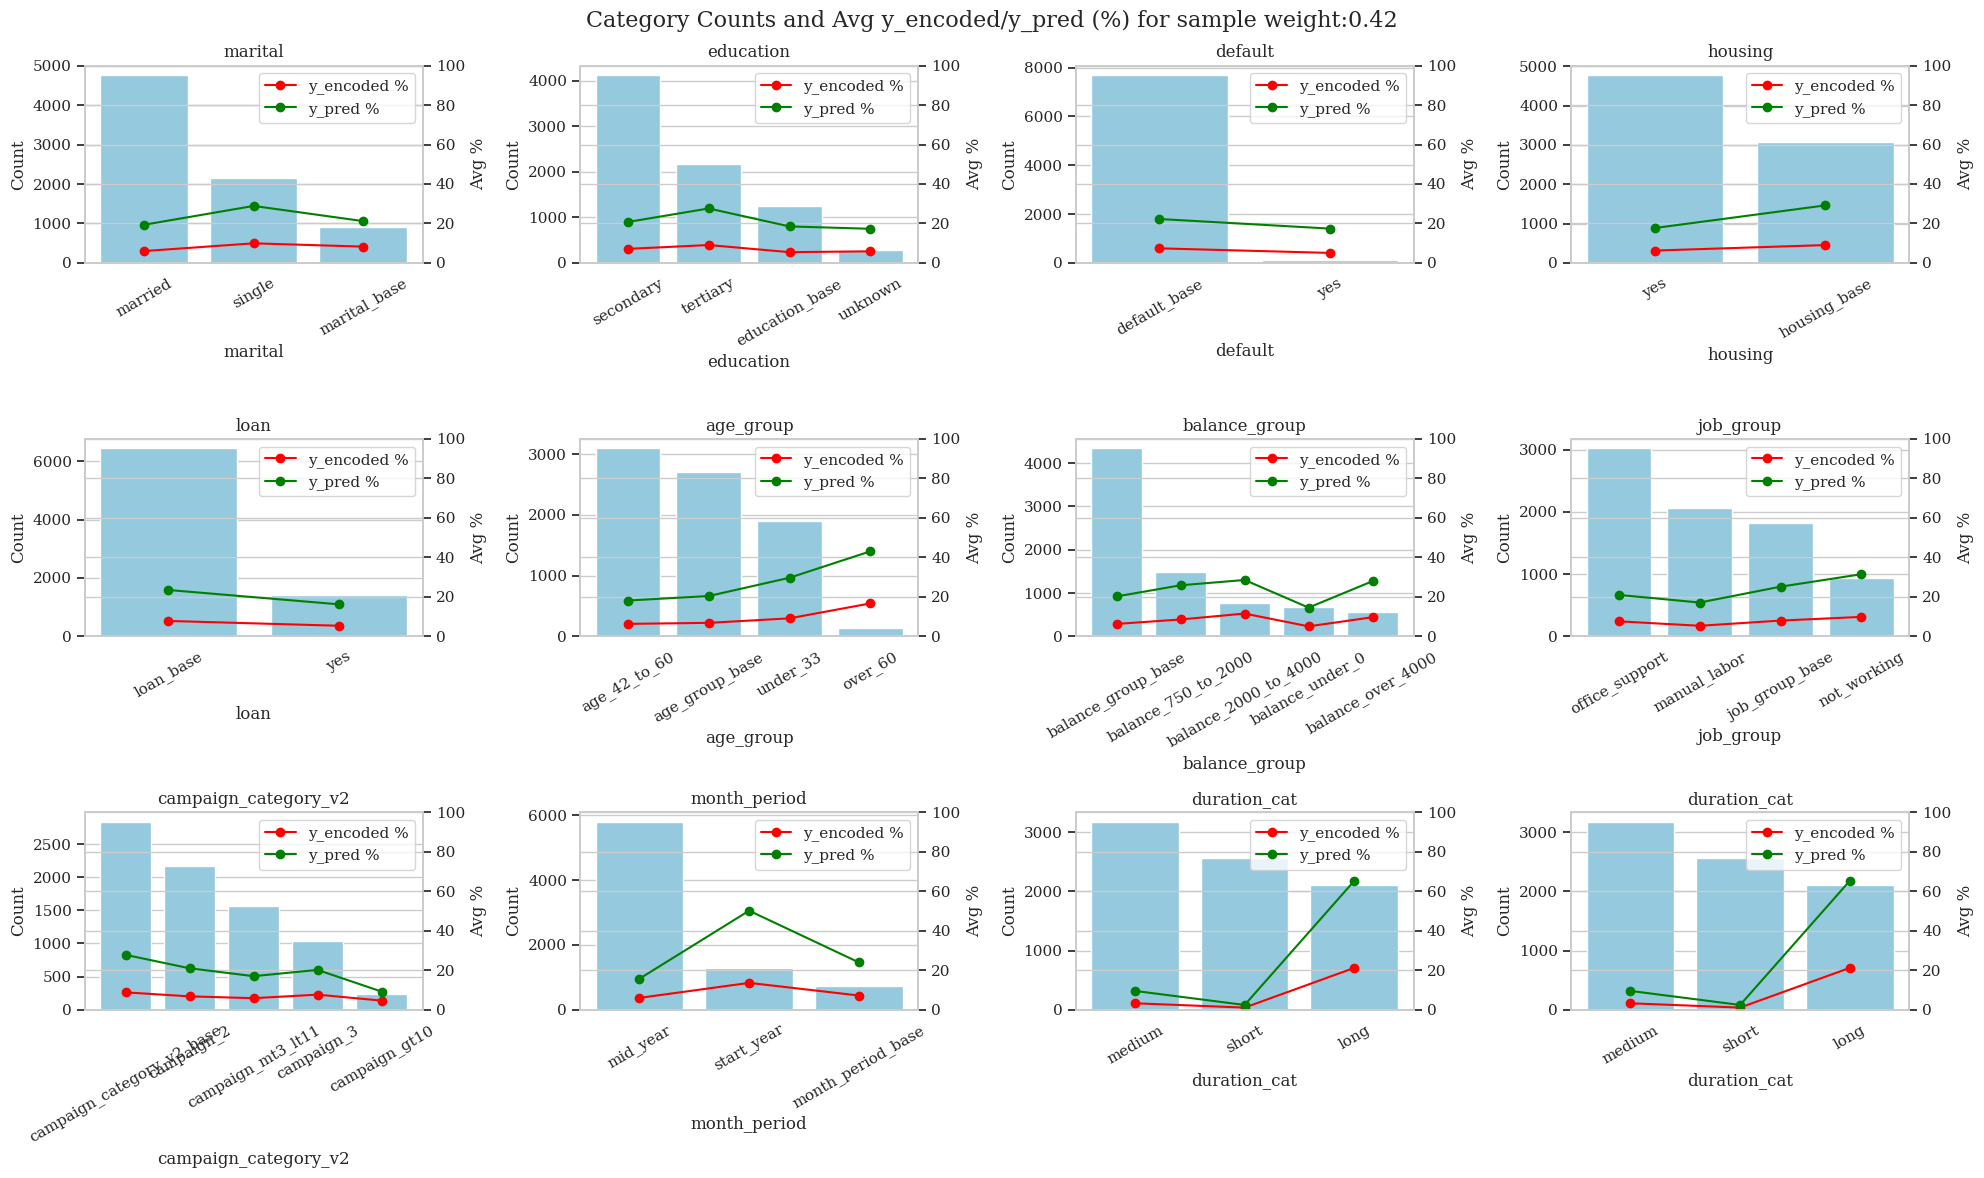

C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
C:\Users\samar\AppData\Local\Temp\ipykernel_14428\390178720.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)
C

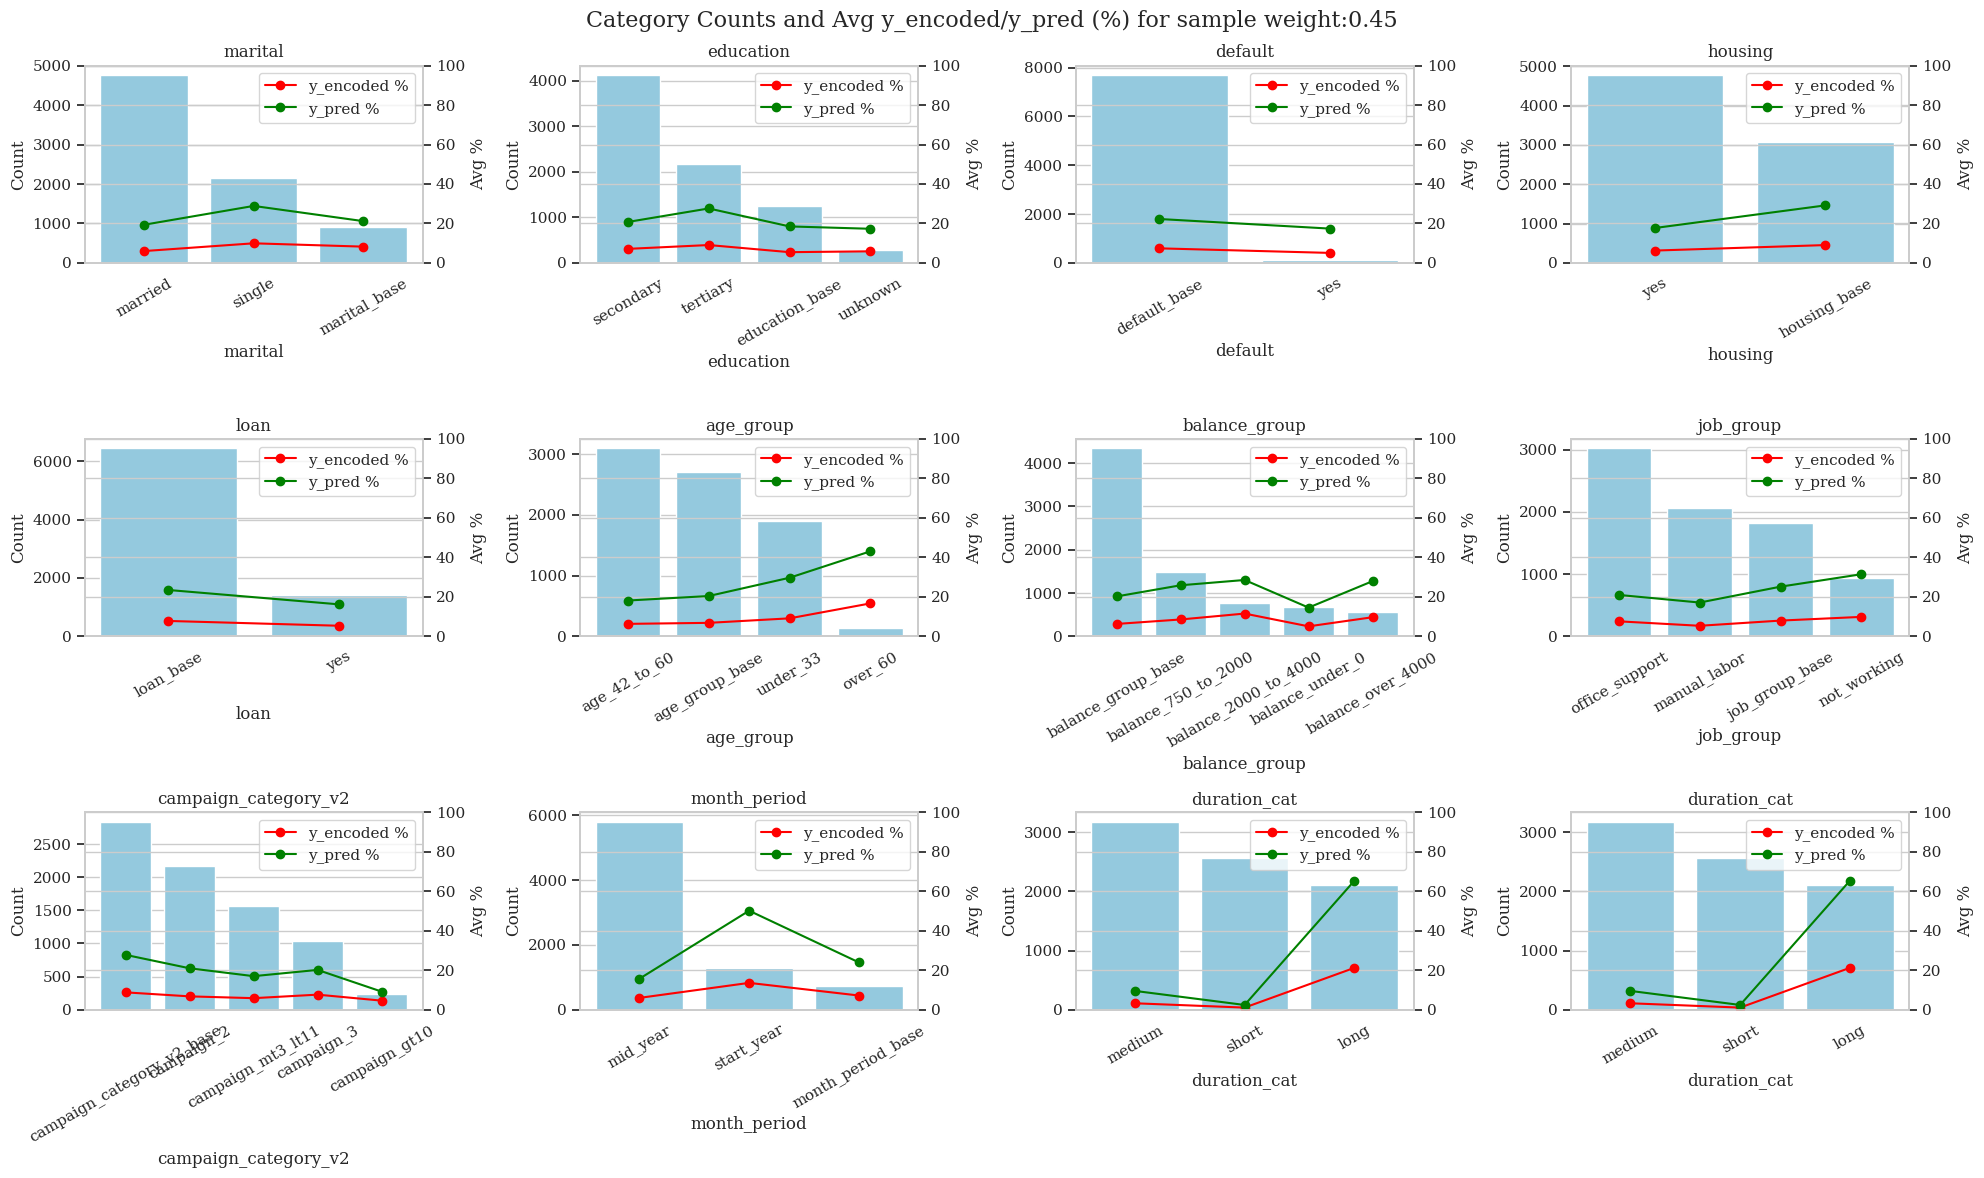

In [28]:
import numpy as np
import joblib
import seaborn as sns
import math

import matplotlib.pyplot as plt

# 1. Train and test for different negative sample weights
weights = np.arange(0.06, 0.46, 0.03)
recalls = []
accuracies = []
cms = []

X_test = test_data[cls_features]
y_test = test_data['y_encoded']
X_test_scaled = scaler2.transform(X_test)

for w in weights:
    sample_weights = np.where(y_train_cls == 1, 1, w)
    model = joblib.load('xgb_cls_model_auc_all_features_extra.joblib')
    model.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)
    y_pred = model.predict(X_test_scaled)
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))


    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), constrained_layout=True)
    axes = axes.flatten()

    for idx, feature in enumerate(cat_features):
        ax = axes[idx]
        order = df_cat[feature].value_counts().index
        sns.countplot(data=df_cat, x=feature, order=order, ax=ax, color='skyblue')
        ax.set_ylabel('Count')
        ax.set_title(f'{feature}')
        ax.tick_params(axis='x', rotation=30)
        avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
        avg_stats = avg_stats.loc[order]
        ax2 = ax.twinx()
        ax2.plot(order, avg_stats['y_encoded'], color='red', marker='o', label='y_encoded %')
        ax2.plot(order, avg_stats['y_pred'], color='green', marker='o', label='y_pred %')
        ax2.set_ylabel('Avg %')
        ax2.set_ylim(0, 100)
        ax2.legend(loc='upper right')

    for j in range(idx+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Category Counts and Avg y_encoded/y_pred (%) for sample weight:{w}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.tight_layout()
    plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_8988\3031185334.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


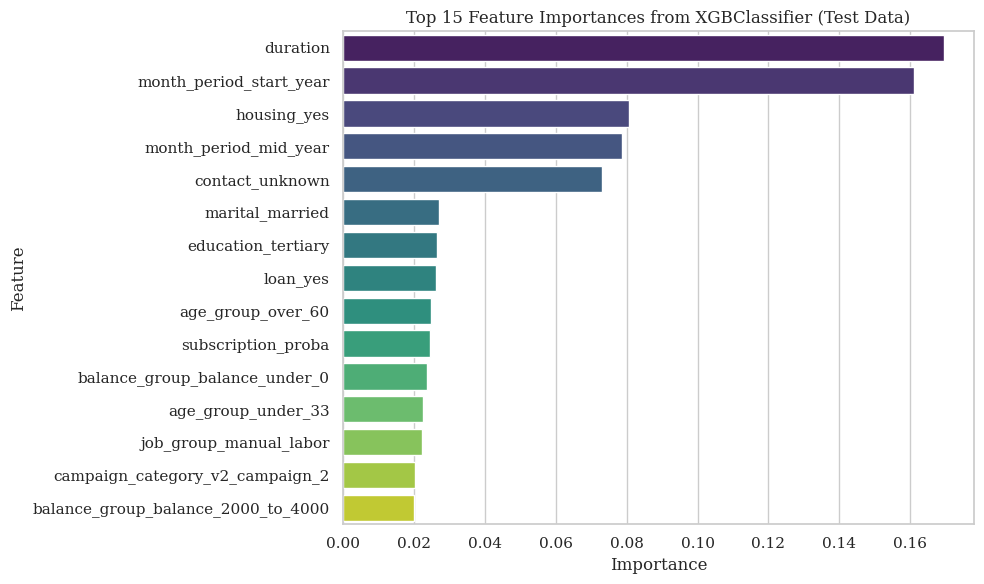

In [ ]:
# Get feature importances from the trained XGBClassifier model for test_data
test_feature_importances = xgb_cls_loaded.feature_importances_
test_feature_names = test_X.columns

# Create a DataFrame for visualization
test_feat_imp_df = pd.DataFrame({
    'feature': test_feature_names,
    'importance': test_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=test_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier (Test Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()